In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import least_squares
import glob

files_list=glob.glob('.\Data\*.txt')
post_data={}
post_data['File name']=[]
post_data['Success']=[]


def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )
def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff


#### Condiciones iniciales

In [3]:
initial_conditions={}
initial_conditions['Number of peaks']=2
initial_conditions['Bottom limit']=2500
initial_conditions['Up limit']=3000
initial_conditions['Help list']=[2700,2980]



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.5467e+00                                    2.68e+01    
       1              5         1.6647e+00      6.88e+00       1.49e+01       1.25e+00    
       2              6         1.5890e+00      7.58e-02       2.99e+01       3.97e+00    
       3              8         1.5846e+00      4.41e-03       7.47e+00       1.31e+00    
       4              9         1.3405e+00      2.44e-01       1.87e+00       1.73e-01    
       5             10         1.2884e+00      5.20e-02       3.73e+00       1.70e-01    
       6             11         1.1660e+00      1.22e-01       7.47e+00       3.11e-01    
       7             12         9.0715e-01      2.59e-01       1.49e+01       5.94e-01    
       8             13         4.4283e-01      4.64e-01       2.99e+01       7.24e-01    
       9             14         9.8712e-02      3.44e-01       5.98e+01       1.89e+00    

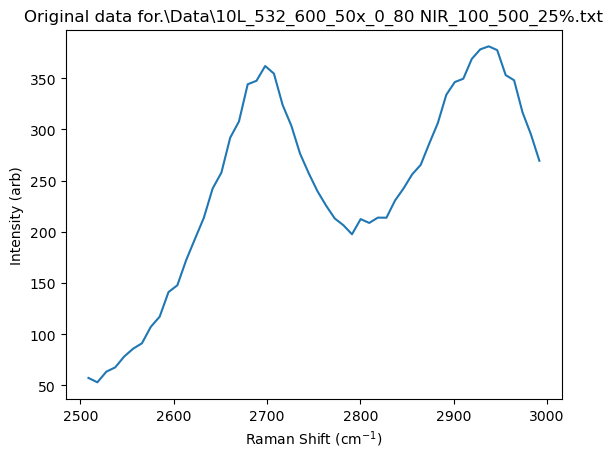

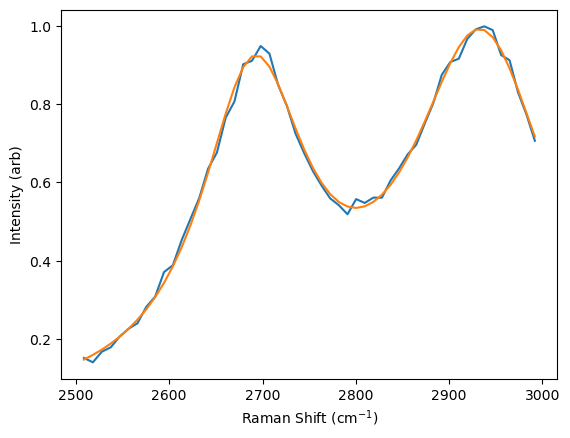

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3750e+00                                    1.94e+01    
       1              5         7.8801e-01      3.59e+00       1.28e+01       4.22e-01    
       2              8         7.5109e-01      3.69e-02       1.60e+00       1.70e-02    
       3              9         7.4284e-01      8.25e-03       3.20e+00       1.80e-01    
       4             10         7.1761e-01      2.52e-02       3.20e+00       5.75e-02    
       5             11         6.7899e-01      3.86e-02       6.40e+00       1.94e-01    
       6             12         5.8340e-01      9.56e-02       1.28e+01       3.17e-01    
       7             13         3.9611e-01      1.87e-01       2.56e+01       4.97e-01    
       8             14         1.3744e-01      2.59e-01       5.12e+01       9.00e-01    
       9             15         4.8803e-02      8.86e-02       5.99e+01       1.82e+00    

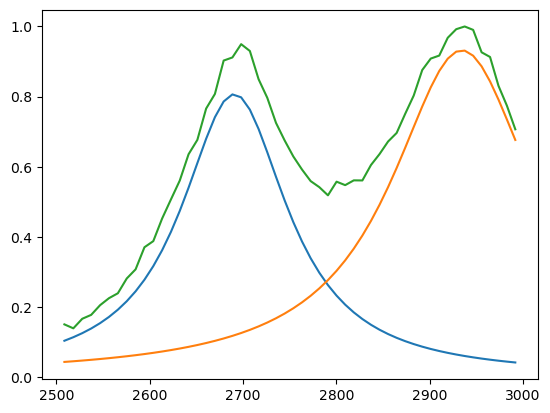

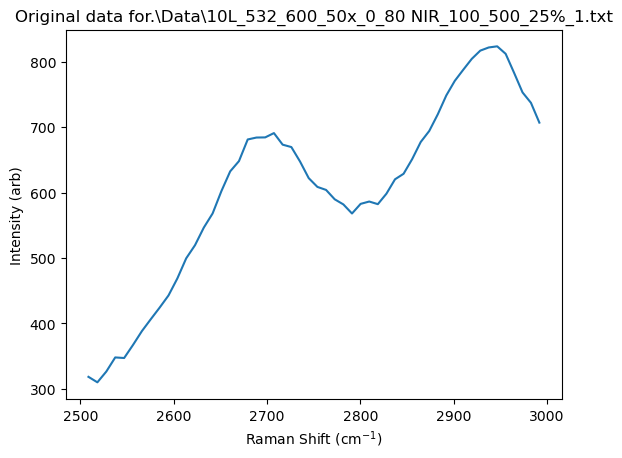

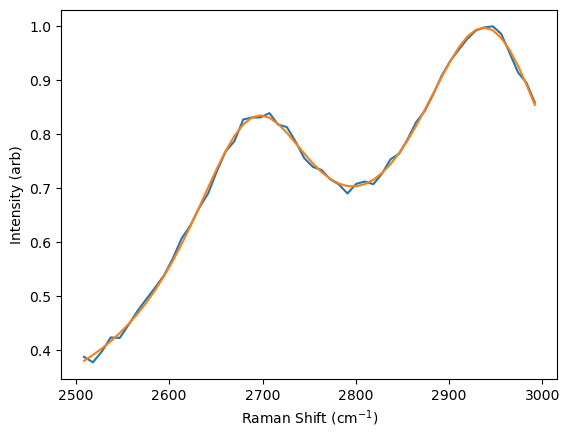

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6053e+00                                    2.19e+01    
       1              5         1.0196e+00      4.59e+00       1.30e+01       8.86e-01    
       2              7         9.6964e-01      4.99e-02       6.50e+00       6.00e-01    
       3              8         8.9547e-01      7.42e-02       6.50e+00       4.64e-01    
       4             10         8.5885e-01      3.66e-02       3.25e+00       8.69e-02    
       5             11         7.9981e-01      5.90e-02       6.50e+00       1.91e-01    
       6             12         7.0181e-01      9.80e-02       1.30e+01       4.03e-01    
       7             13         4.3670e-01      2.65e-01       2.60e+01       6.95e-01    
       8             14         1.3197e-01      3.05e-01       5.20e+01       4.29e-01    
       9             15         4.6701e-02      8.53e-02       4.87e+01       1.71e+00    

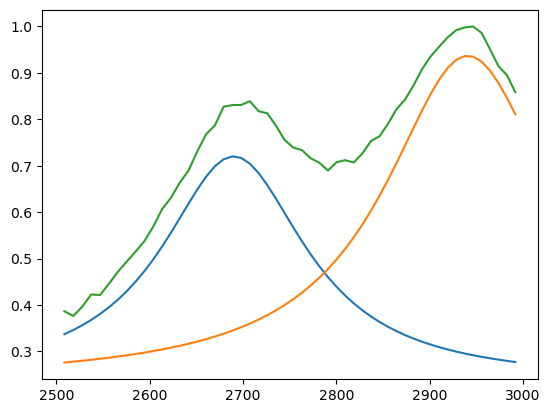

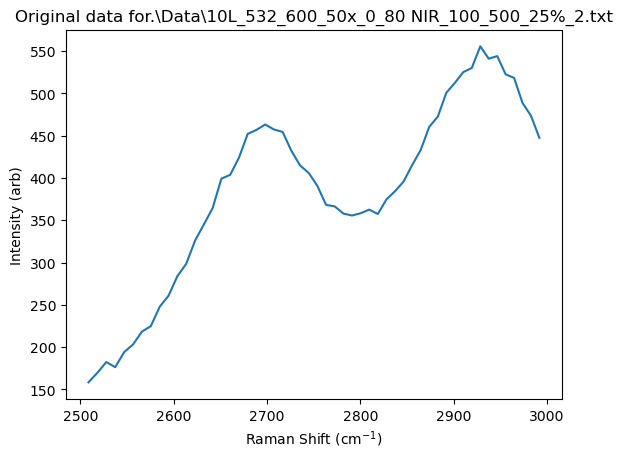

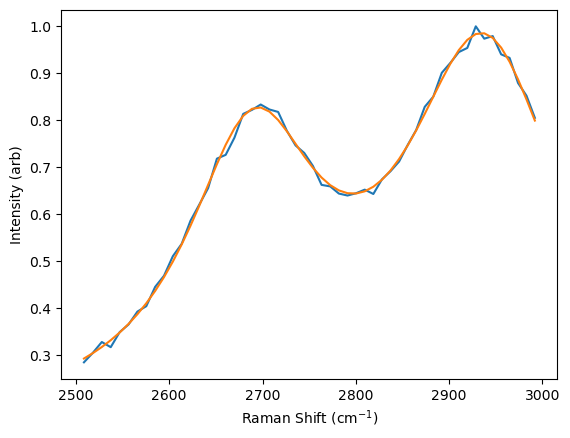

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.5262e+00                                    2.83e+01    
       1              5         2.1323e+00      7.39e+00       1.66e+01       2.22e+00    
       2              7         1.8593e+00      2.73e-01       8.30e+00       1.40e+00    
       3              8         1.7720e+00      8.72e-02       8.30e+00       1.19e+00    
       4             10         1.6869e+00      8.52e-02       2.08e+00       1.99e-01    
       5             11         1.6307e+00      5.62e-02       4.15e+00       1.18e-01    
       6             12         1.5152e+00      1.15e-01       8.30e+00       2.78e-01    
       7             13         1.2320e+00      2.83e-01       1.66e+01       6.22e-01    
       8             14         6.5408e-01      5.78e-01       3.32e+01       8.52e-01    
       9             15         1.7569e-01      4.78e-01       6.64e+01       2.61e+00    

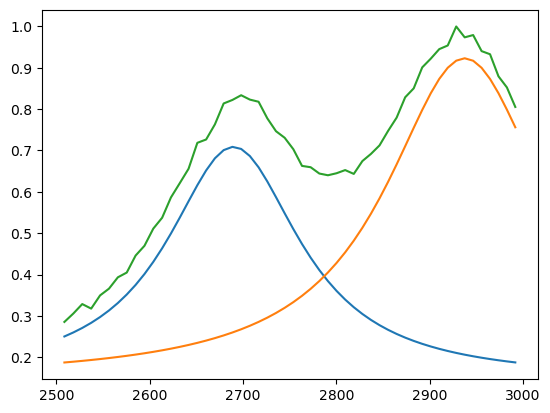

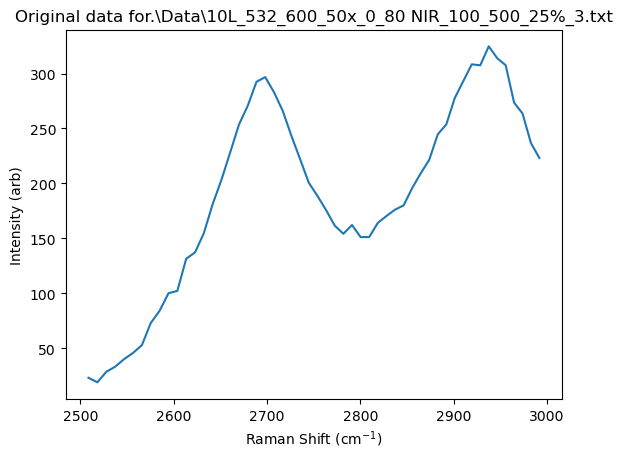

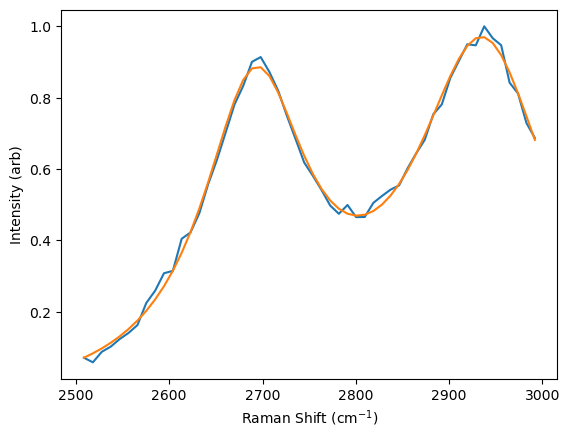

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8918e+01                                    3.94e+01    
       1              5         7.0026e+00      1.19e+01       2.19e+01       6.92e+00    
       2              7         5.4384e+00      1.56e+00       1.09e+01       7.28e+00    
       3              9         3.8030e+00      1.64e+00       2.73e+00       1.13e-01    
       4             10         3.6745e+00      1.28e-01       5.47e+00       1.47e+00    
       5             11         3.3230e+00      3.52e-01       5.47e+00       4.87e-01    
       6             12         3.2240e+00      9.90e-02       1.09e+01       6.83e-01    
       7             14         3.0724e+00      1.52e-01       2.73e+00       1.64e-01    
       8             16         3.0469e+00      2.55e-02       1.37e+00       1.44e-02    
       9             17         3.0378e+00      9.10e-03       2.73e+00       3.17e-01    

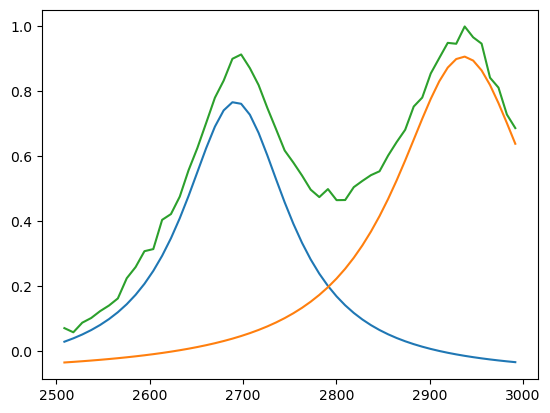

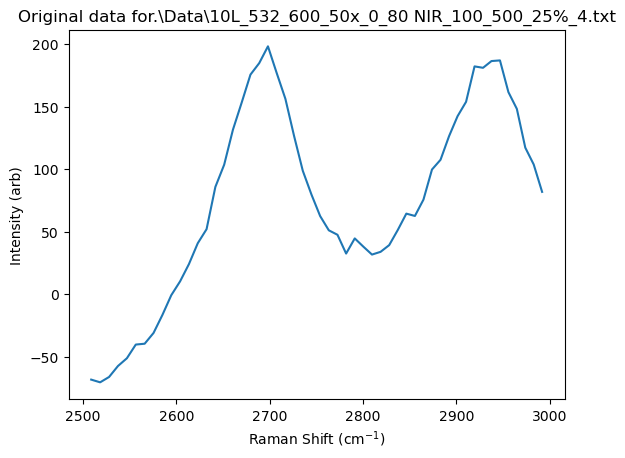

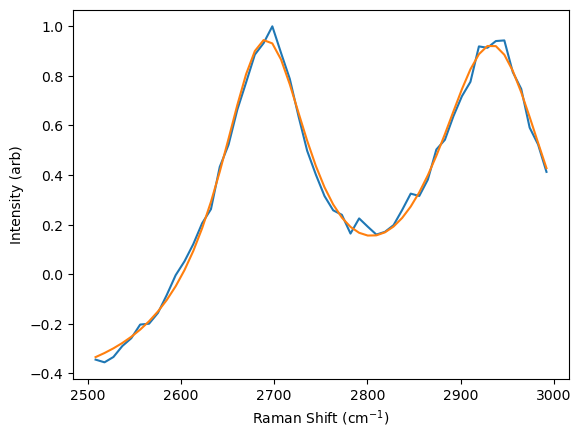

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6308e-01                                    3.76e+00    
       1              5         2.5278e-02      1.38e-01       1.10e+01       2.77e-02    
       2              9         2.5080e-02      1.98e-04       3.45e-01       2.72e-03    
       3             11         2.5062e-02      1.79e-05       1.72e-01       7.02e-04    
       4             12         2.5042e-02      2.04e-05       3.45e-01       6.51e-03    
       5             14         2.5022e-02      1.96e-05       1.72e-01       8.80e-04    
       6             15         2.5000e-02      2.25e-05       3.45e-01       6.14e-03    
       7             16         2.4978e-02      2.21e-05       6.89e-01       1.77e-02    
       8             17         2.4856e-02      1.22e-04       6.89e-01       5.69e-03    
       9             18         2.4803e-02      5.32e-05       1.38e+00       2.90e-02    

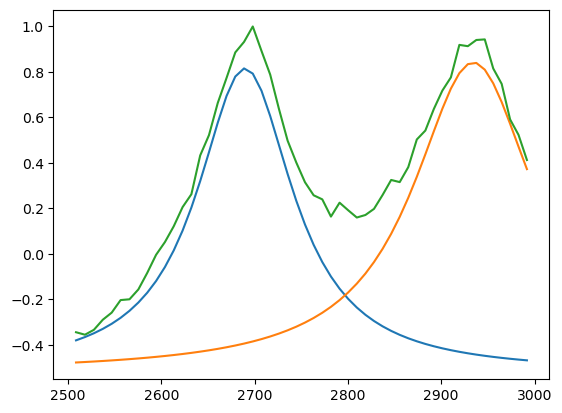

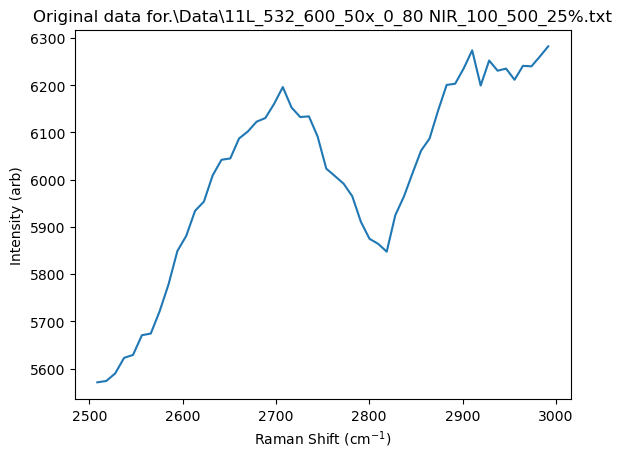

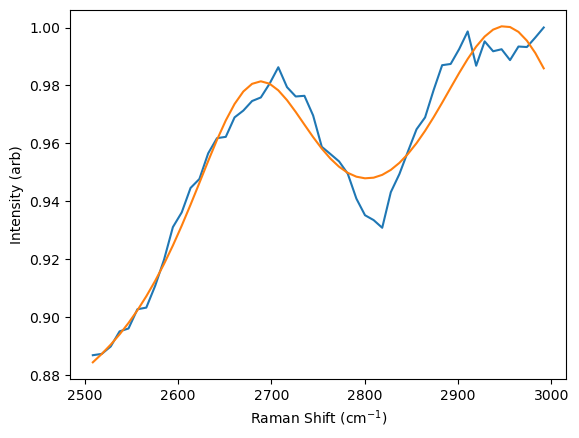

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6332e-01                                    4.72e+00    
       1              5         6.8888e-02      1.94e-01       1.15e+01       2.67e-01    
       2              8         4.3175e-02      2.57e-02       1.43e+00       8.20e-02    
       3              9         4.0286e-02      2.89e-03       2.86e+00       5.26e-02    
       4             11         3.9537e-02      7.49e-04       1.43e+00       1.33e-02    
       5             12         3.8466e-02      1.07e-03       2.86e+00       4.52e-02    
       6             14         3.7492e-02      9.73e-04       1.43e+00       5.42e-03    
       7             15         3.6957e-02      5.35e-04       2.86e+00       6.11e-02    
       8             16         3.5233e-02      1.72e-03       2.86e+00       9.88e-03    
       9             18         3.4707e-02      5.27e-04       1.43e+00       1.03e-02    

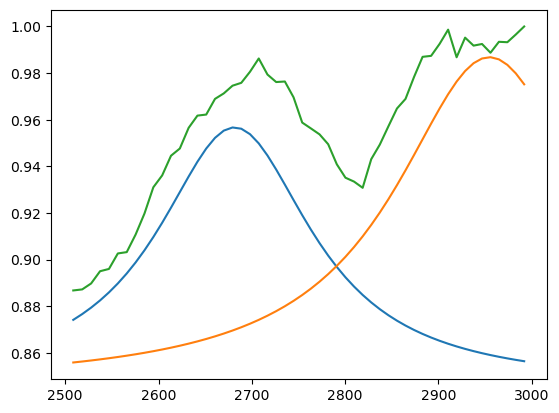

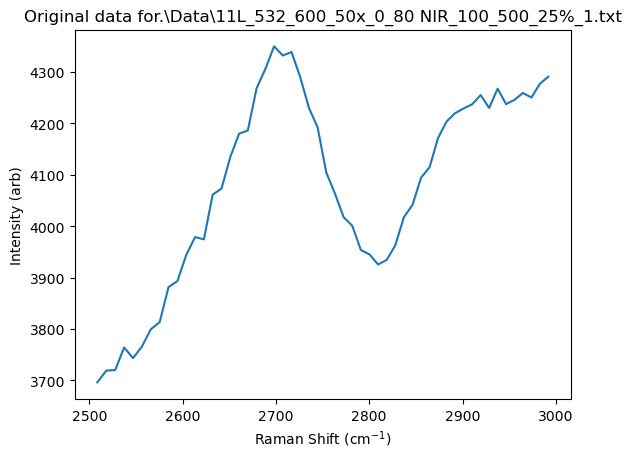

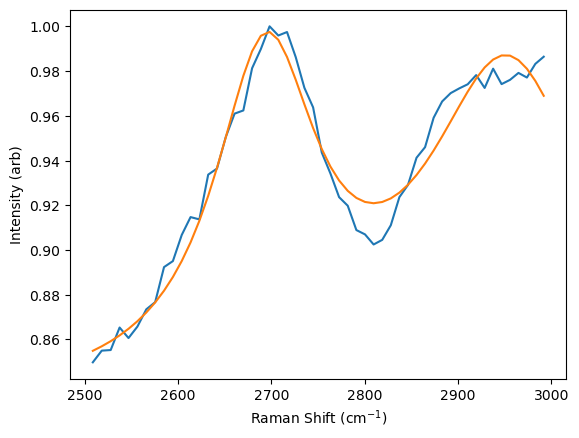

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4861e-01                                    3.42e+00    
       1              5         3.1156e-02      1.17e-01       8.26e+00       1.03e-01    
       2              8         2.9525e-02      1.63e-03       1.03e+00       5.97e-02    
       3              9         2.8467e-02      1.06e-03       1.03e+00       3.13e-03    
       4             11         2.8210e-02      2.57e-04       5.16e-01       4.35e-03    
       5             12         2.7686e-02      5.24e-04       1.03e+00       1.36e-02    
       6             13         2.6509e-02      1.18e-03       2.06e+00       2.46e-02    
       7             14         2.3836e-02      2.67e-03       4.13e+00       4.40e-02    
       8             15         1.9348e-02      4.49e-03       8.26e+00       6.01e-02    
       9             17         1.7143e-02      2.20e-03       4.13e+00       1.03e-02    

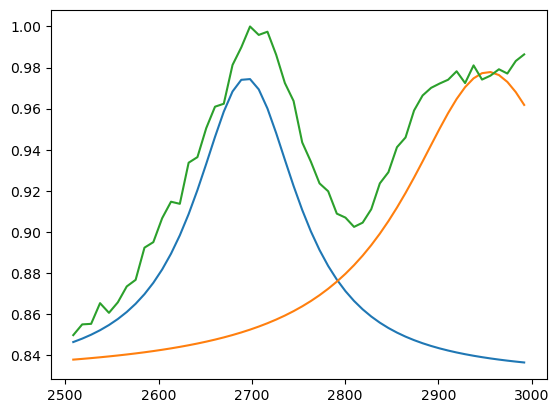

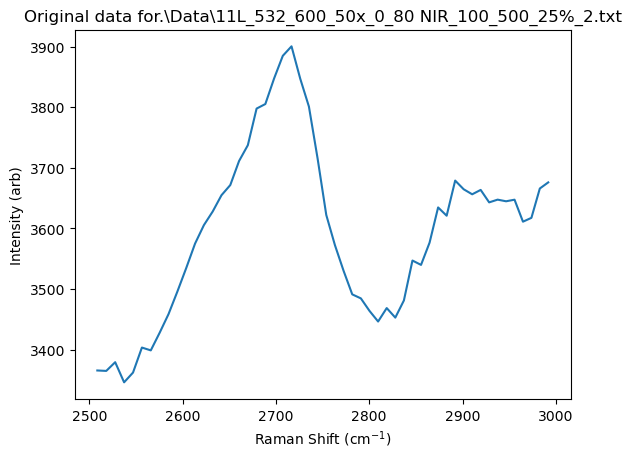

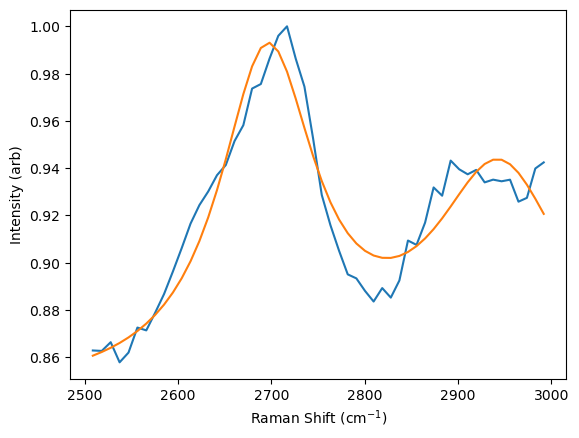

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.3459e+00                                    2.42e+01    
       1              5         2.6695e+00      5.68e+00       1.99e+01       2.11e+00    
       2              6         2.1524e+00      5.17e-01       3.99e+01       5.15e+00    
       3              8         1.3033e+00      8.49e-01       9.97e+00       6.74e-01    
       4              9         8.4251e-01      4.61e-01       1.99e+01       4.78e-01    
       5             11         7.9338e-01      4.91e-02       9.97e+00       9.34e-01    
       6             13         7.5362e-01      3.98e-02       2.49e+00       1.91e-01    
       7             15         7.4757e-01      6.05e-03       1.25e+00       2.19e-02    
       8             16         7.4435e-01      3.22e-03       2.49e+00       9.86e-02    
       9             17         7.3368e-01      1.07e-02       2.49e+00       4.16e-02    

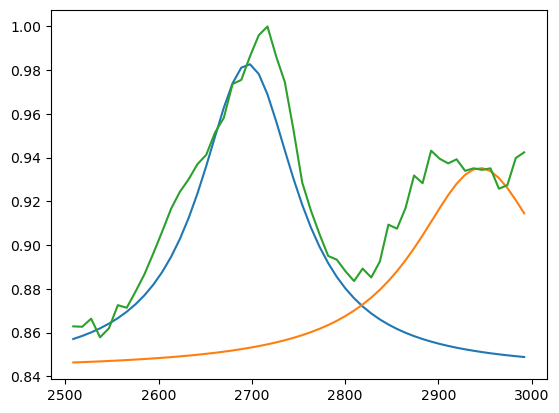

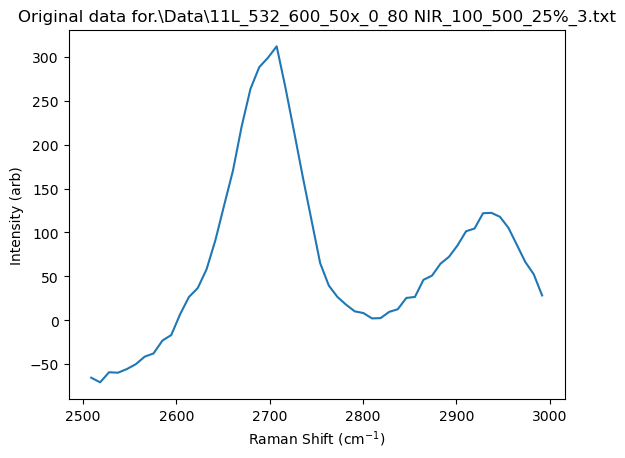

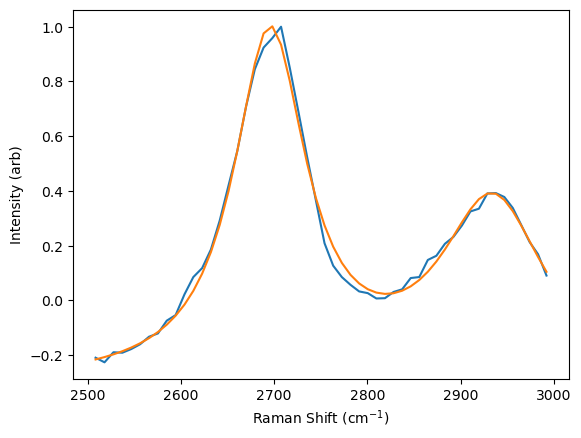

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4604e+01                                    4.91e+01    
       1              6         1.6463e+01      1.81e+01       1.03e+01       6.33e+00    
       2              7         9.9817e+00      6.48e+00       1.03e+01       6.95e+00    
       3              8         4.9090e+00      5.07e+00       1.03e+01       4.52e+00    
       4              9         4.5986e+00      3.10e-01       2.06e+01       5.22e+00    
       5             10         3.4427e+00      1.16e+00       5.14e+00       3.66e-01    
       6             13         3.4376e+00      5.11e-03       6.43e-01       7.12e-02    
       7             15         3.4363e+00      1.32e-03       1.61e-01       4.24e-03    
       8             16         3.4360e+00      2.75e-04       1.61e-01       3.54e-03    
       9             18         3.4360e+00      6.46e-05       4.02e-02       1.15e-03    

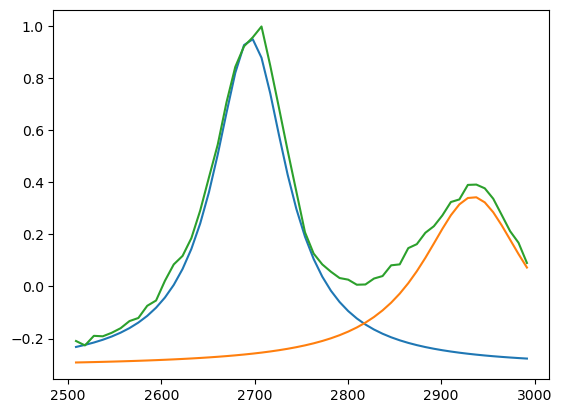

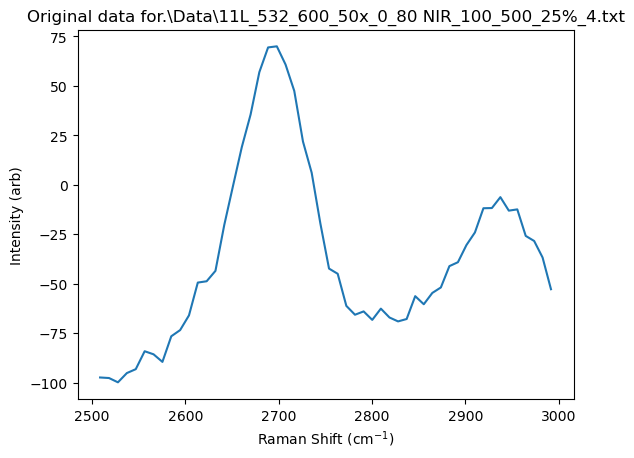

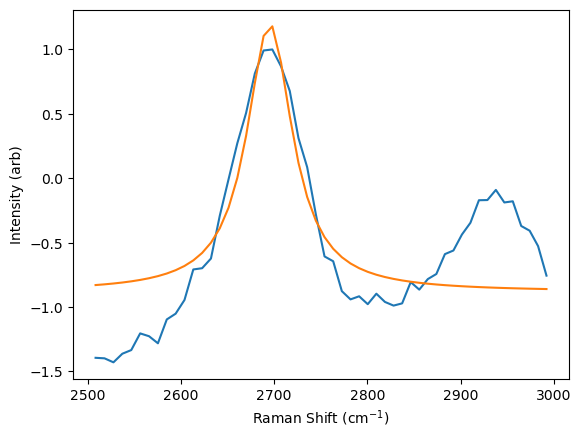

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2896e-01                                    3.31e+00    
       1              5         6.3818e-02      6.51e-02       1.16e+01       2.98e-01    
       2              8         2.1869e-02      4.19e-02       7.25e-01       1.07e-02    
       3              9         2.1017e-02      8.52e-04       1.45e+00       6.47e-03    
       4             10         2.0775e-02      2.42e-04       2.90e+00       4.43e-02    
       5             11         1.9624e-02      1.15e-03       2.90e+00       9.94e-03    
       6             12         1.8526e-02      1.10e-03       5.80e+00       3.28e-02    
       7             13         1.6963e-02      1.56e-03       1.16e+01       7.00e-02    
       8             14         1.3584e-02      3.38e-03       2.32e+01       6.90e-02    
       9             16         1.1728e-02      1.86e-03       1.16e+01       6.04e-02    

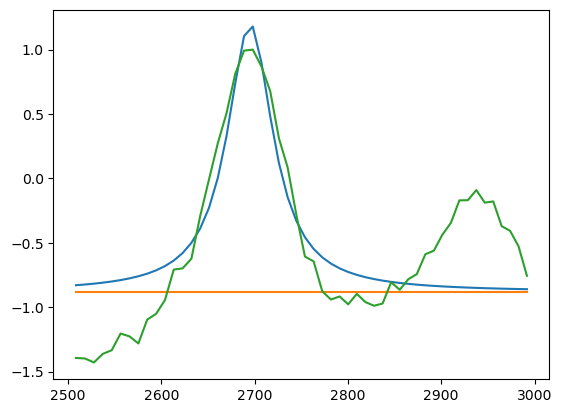

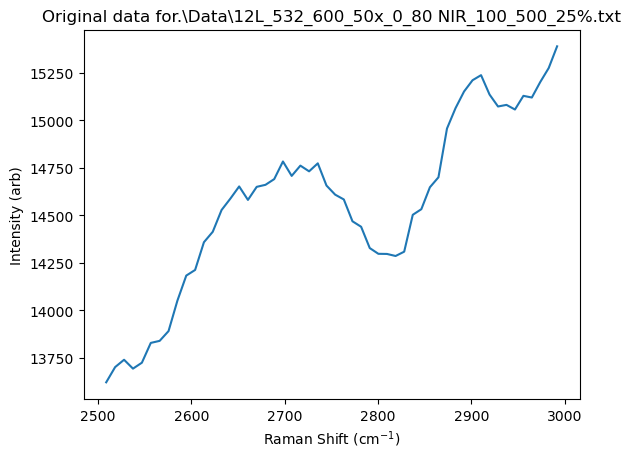

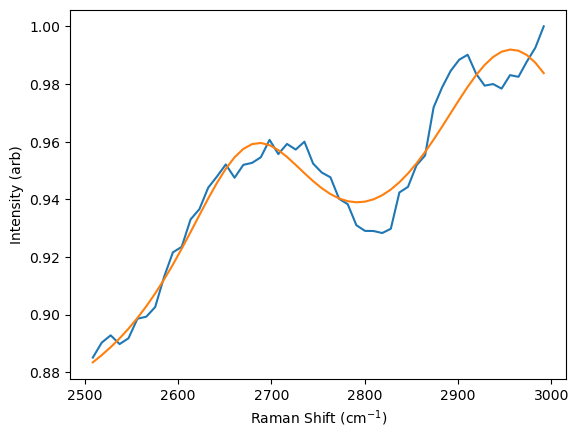

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3217e-01                                    4.50e+00    
       1              5         4.3985e-02      1.88e-01       1.17e+01       1.38e-01    
       2              8         3.6447e-02      7.54e-03       1.46e+00       1.09e-01    
       3              9         3.4096e-02      2.35e-03       2.92e+00       3.73e-02    
       4             11         3.3492e-02      6.04e-04       1.46e+00       1.65e-02    
       5             12         3.2641e-02      8.51e-04       2.92e+00       1.83e-02    
       6             13         3.0928e-02      1.71e-03       5.83e+00       3.35e-02    
       7             14         2.7539e-02      3.39e-03       1.17e+01       5.09e-02    
       8             15         2.0926e-02      6.61e-03       2.33e+01       7.54e-02    
       9             16         1.1074e-02      9.85e-03       4.66e+01       8.53e-02    

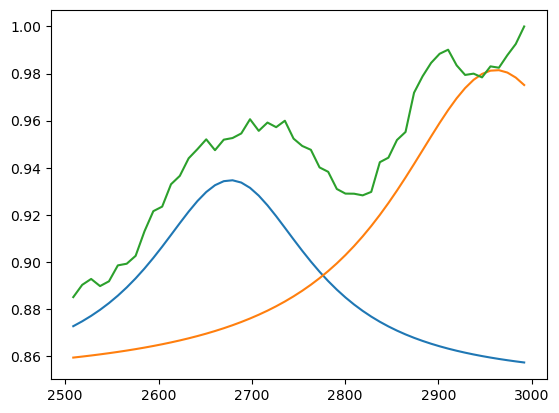

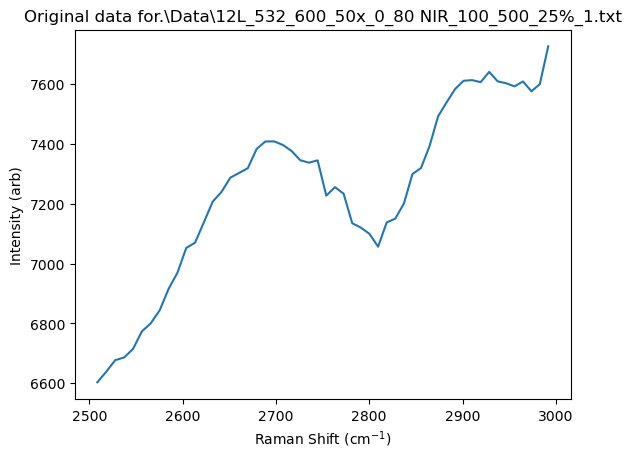

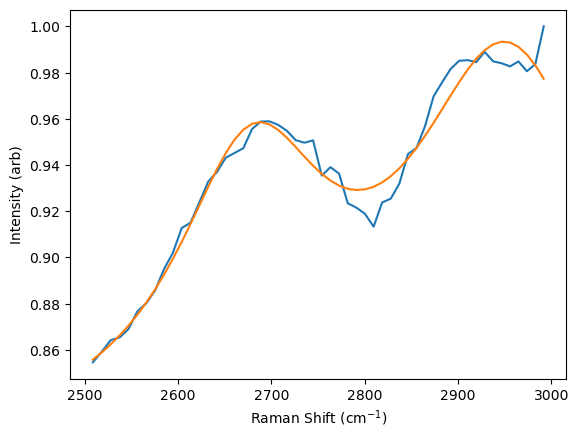

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0722e-01                                    4.24e+00    
       1              5         4.6621e-02      1.61e-01       1.15e+01       1.78e-01    
       2              8         3.3890e-02      1.27e-02       1.44e+00       1.24e-01    
       3              9         3.1431e-02      2.46e-03       2.89e+00       5.03e-02    
       4             11         3.0613e-02      8.18e-04       1.44e+00       2.51e-02    
       5             12         3.0053e-02      5.60e-04       1.44e+00       5.58e-03    
       6             13         2.9268e-02      7.85e-04       2.89e+00       1.97e-02    
       7             14         2.7557e-02      1.71e-03       5.77e+00       3.14e-02    
       8             15         2.4427e-02      3.13e-03       1.15e+01       4.97e-02    
       9             16         1.8392e-02      6.03e-03       2.31e+01       7.00e-02    

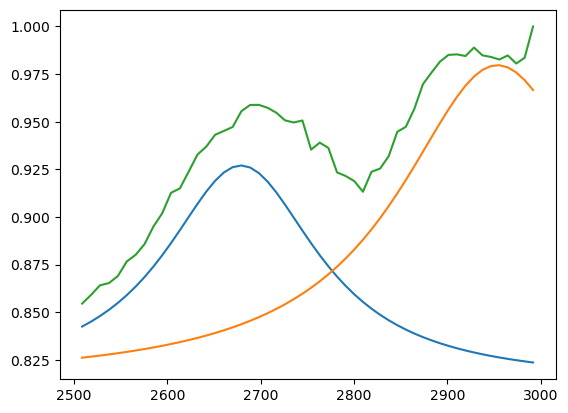

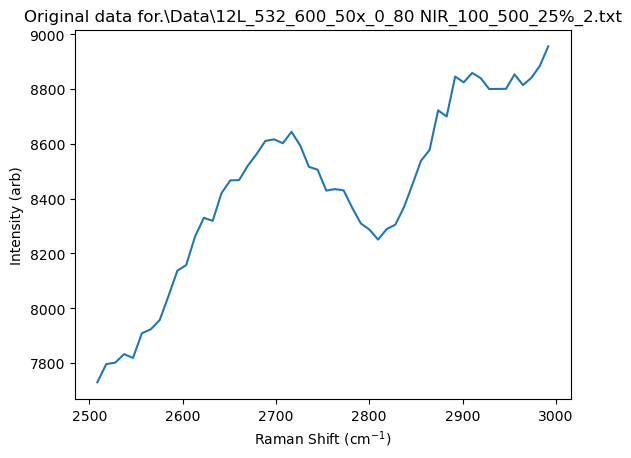

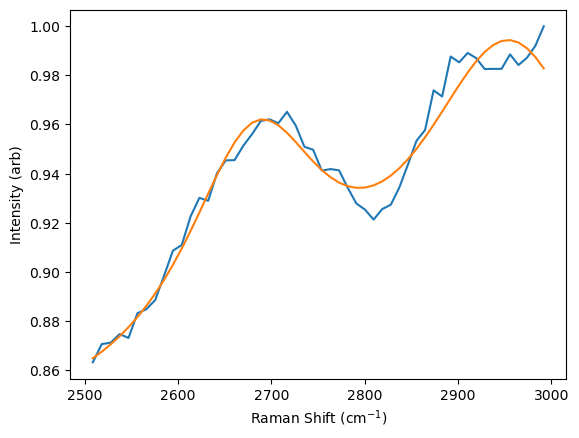

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.1664e-01                                    7.19e+00    
       1              5         1.4840e-01      4.68e-01       1.19e+01       4.05e-01    
       2              8         1.0348e-01      4.49e-02       1.48e+00       1.02e-01    
       3              9         9.7576e-02      5.91e-03       2.97e+00       3.47e-02    
       4             11         9.5715e-02      1.86e-03       1.48e+00       1.27e-02    
       5             12         9.3329e-02      2.39e-03       2.97e+00       6.72e-02    
       6             14         9.1384e-02      1.94e-03       1.48e+00       6.70e-03    
       7             15         9.1319e-02      6.54e-05       2.97e+00       1.11e-01    
       8             16         8.8548e-02      2.77e-03       7.42e-01       1.00e-02    
       9             17         8.7526e-02      1.02e-03       1.48e+00       1.91e-02    

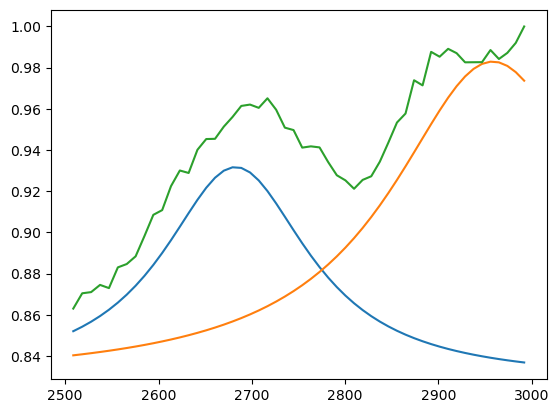

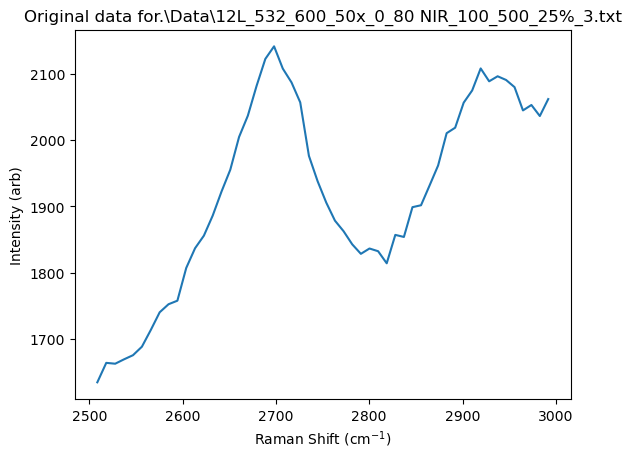

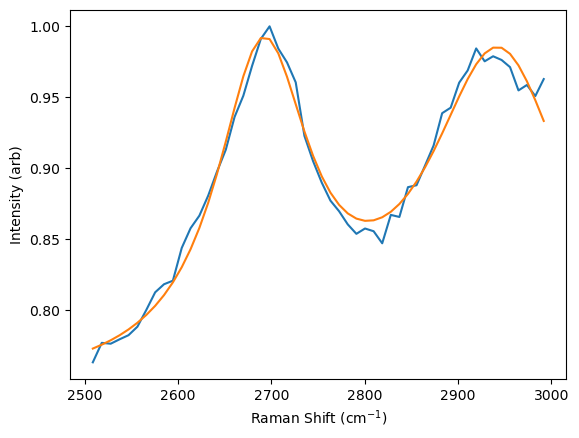

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5057e-01                                    3.55e+00    
       1              5         4.8819e-02      1.02e-01       1.22e+01       2.39e-01    
       2              8         3.1038e-02      1.78e-02       1.52e+00       1.80e-01    
       3              9         2.8901e-02      2.14e-03       3.05e+00       5.24e-02    
       4             10         2.6174e-02      2.73e-03       3.05e+00       8.09e-03    
       5             11         2.4297e-02      1.88e-03       6.10e+00       3.33e-02    
       6             12         2.1425e-02      2.87e-03       1.22e+01       6.46e-02    
       7             13         1.7988e-02      3.44e-03       2.44e+01       1.40e-01    
       8             14         1.0635e-02      7.35e-03       2.44e+01       4.76e-02    
       9             15         5.3341e-03      5.30e-03       4.88e+01       1.07e-01    

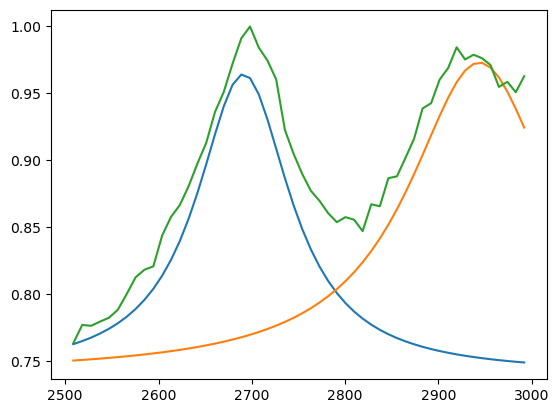

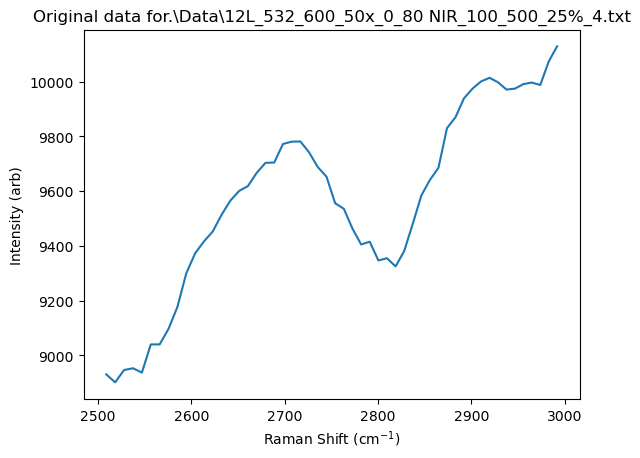

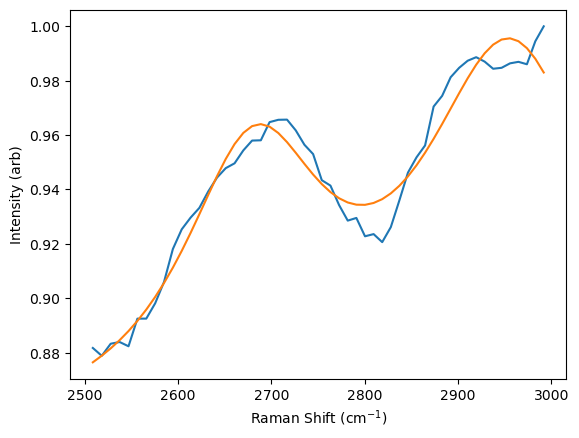

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3480e+02                                    1.02e+02    
       1              6         6.6400e+01      6.84e+01       1.57e+01       1.77e+01    
       2              7         4.3509e+01      2.29e+01       1.57e+01       2.40e+01    
       3              8         2.8710e+01      1.48e+01       1.57e+01       5.61e+00    
       4             10         1.8777e+01      9.93e+00       7.47e+00       1.33e+00    
       5             12         1.7914e+01      8.63e-01       3.73e+00       3.63e-01    
       6             13         1.7782e+01      1.32e-01       7.47e+00       2.07e+00    
       7             14         1.7100e+01      6.82e-01       1.87e+00       6.39e-01    
       8             16         1.7063e+01      3.72e-02       9.34e-01       7.86e-02    
       9             17         1.7043e+01      2.00e-02       9.34e-01       8.28e-02    

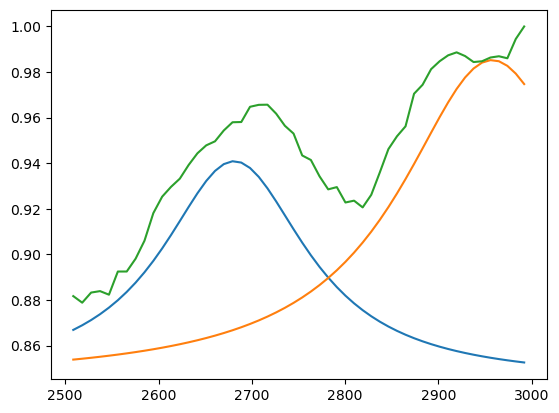

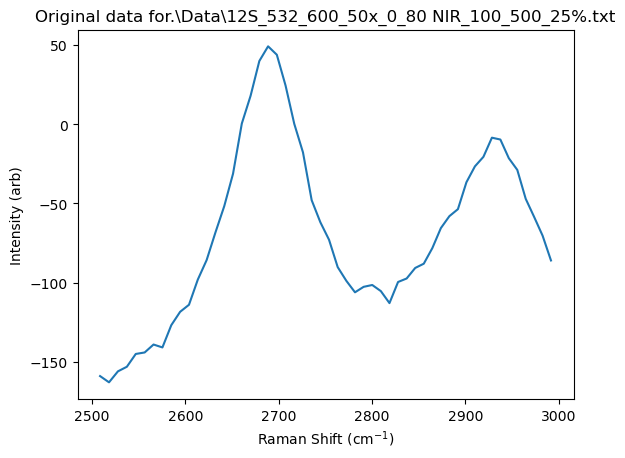

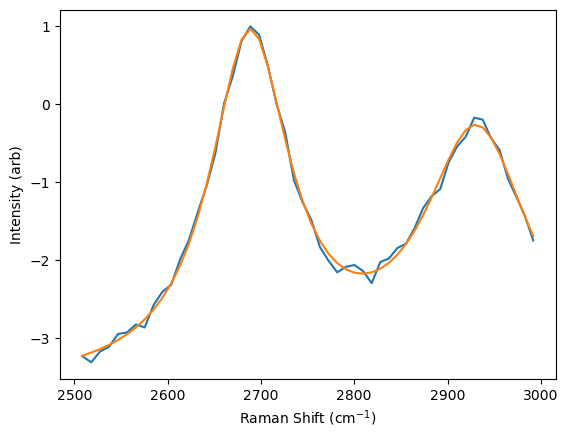

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.9933e-01                                    8.66e+00    
       1              5         3.0023e-01      4.99e-01       1.07e+01       1.51e+00    
       2              7         8.7577e-02      2.13e-01       2.67e+00       7.59e-01    
       3              8         3.5786e-02      5.18e-02       5.34e+00       3.46e-01    
       4              9         2.2279e-02      1.35e-02       1.07e+01       2.81e-01    
       5             10         9.9143e-03      1.24e-02       1.07e+01       8.46e-02    
       6             12         9.4179e-03      4.96e-04       5.34e+00       1.66e-02    
       7             14         9.0976e-03      3.20e-04       1.33e+00       1.90e-03    
       8             16         9.0312e-03      6.65e-05       6.67e-01       1.66e-03    
       9             18         9.0183e-03      1.28e-05       3.34e-01       5.94e-04    

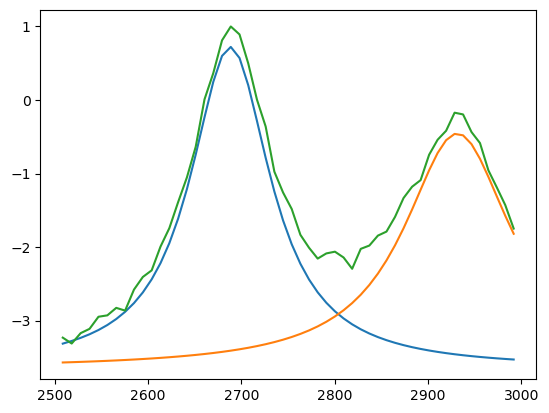

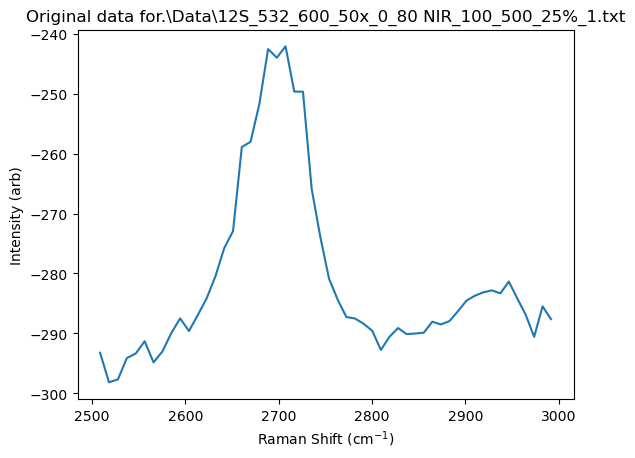

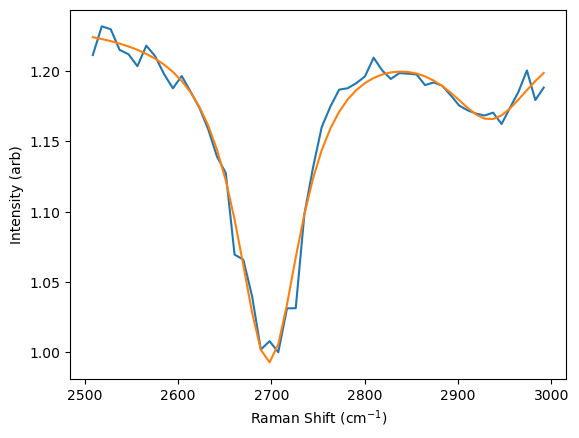

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5535e+01                                    5.20e+01    
       1              6         1.2606e+01      2.29e+01       8.82e+00       4.87e+00    
       2              8         8.4981e+00      4.11e+00       4.41e+00       3.57e+00    
       3              9         6.4086e+00      2.09e+00       4.41e+00       1.04e+00    
       4             11         6.0063e+00      4.02e-01       2.20e+00       4.10e-01    
       5             12         5.3416e+00      6.65e-01       4.41e+00       7.06e-01    
       6             13         4.7319e+00      6.10e-01       8.82e+00       9.66e-01    
       7             15         4.4509e+00      2.81e-01       2.20e+00       3.54e-01    
       8             17         4.4146e+00      3.64e-02       1.10e+00       3.01e-01    
       9             19         4.3992e+00      1.54e-02       2.76e-01       8.51e-02    

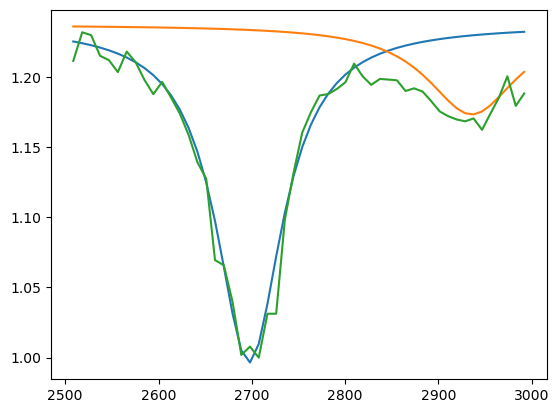

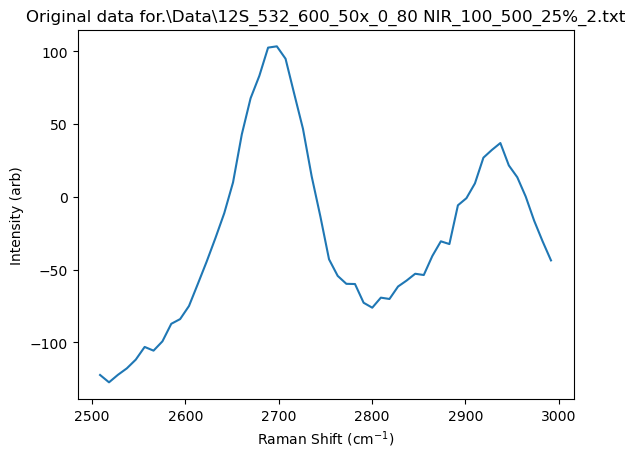

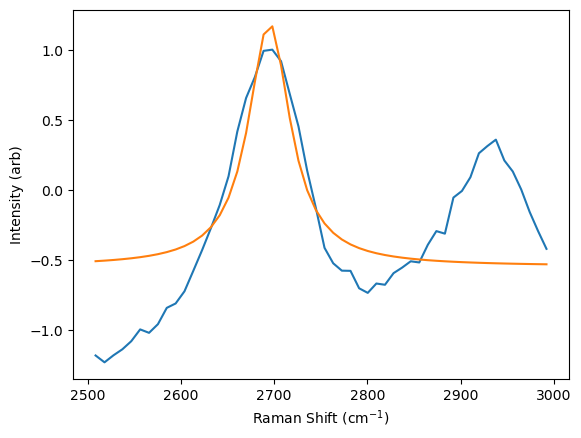

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5535e+01                                    5.20e+01    
       1              6         1.2606e+01      2.29e+01       8.82e+00       4.87e+00    
       2              8         8.4981e+00      4.11e+00       4.41e+00       3.57e+00    
       3              9         6.4086e+00      2.09e+00       4.41e+00       1.04e+00    
       4             11         6.0063e+00      4.02e-01       2.20e+00       4.10e-01    
       5             12         5.3416e+00      6.65e-01       4.41e+00       7.06e-01    
       6             13         4.7319e+00      6.10e-01       8.82e+00       9.66e-01    
       7             15         4.4509e+00      2.81e-01       2.20e+00       3.54e-01    
       8             17         4.4146e+00      3.64e-02       1.10e+00       3.01e-01    
       9             19         4.3992e+00      1.54e-02       2.76e-01       8.51e-02    

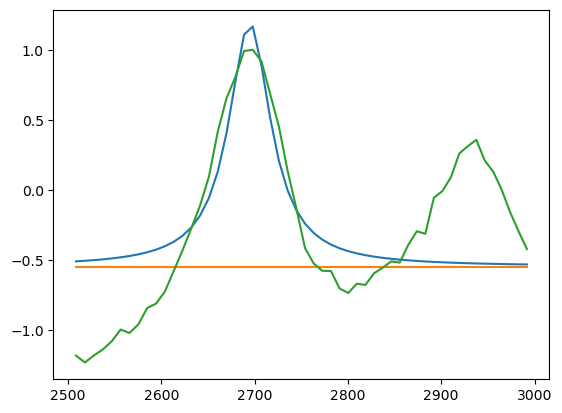

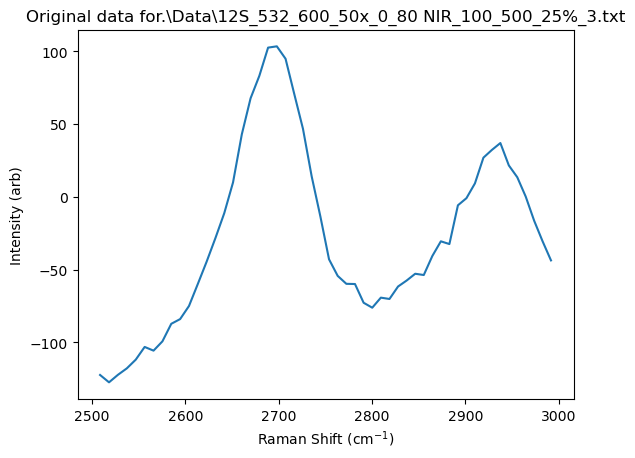

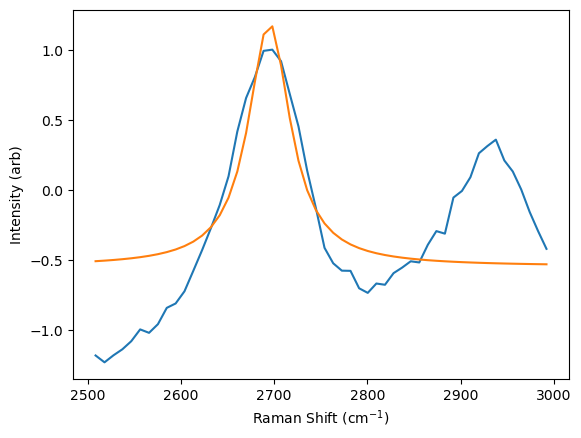

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.8833e+02                                    2.70e+02    
       1              6         7.4857e+01      7.13e+02       1.57e+01       1.30e+01    
       2              8         6.3495e+01      1.14e+01       7.85e+00       7.91e+00    
       3              9         4.4057e+01      1.94e+01       7.85e+00       2.71e+00    
       4             11         3.7862e+01      6.19e+00       3.93e+00       1.06e+00    
       5             12         3.1790e+01      6.07e+00       7.85e+00       1.12e+00    
       6             14         3.0503e+01      1.29e+00       3.93e+00       1.44e-01    
       7             16         3.0438e+01      6.45e-02       1.96e+00       9.31e-02    
       8             18         3.0421e+01      1.69e-02       9.82e-01       6.70e-02    
       9             19         3.0397e+01      2.40e-02       1.96e+00       3.62e-01    

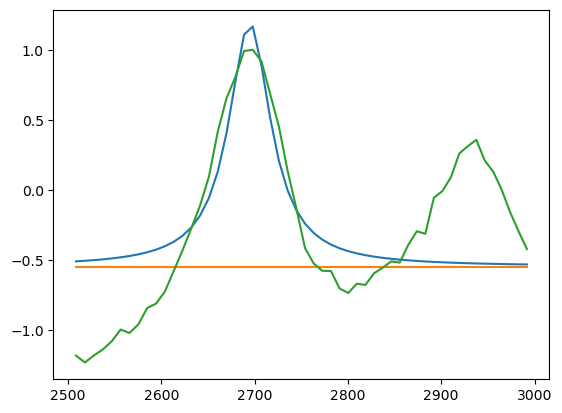

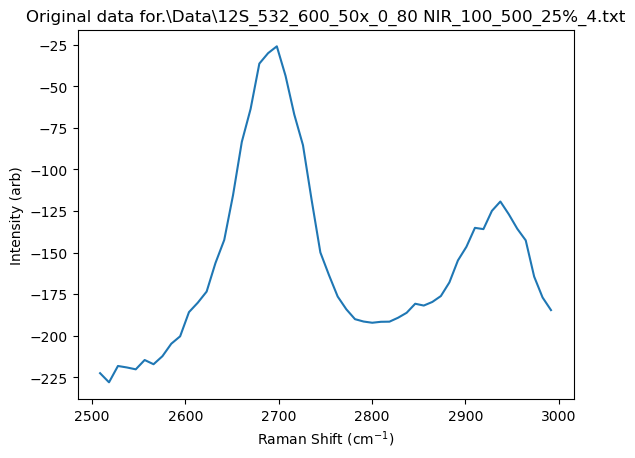

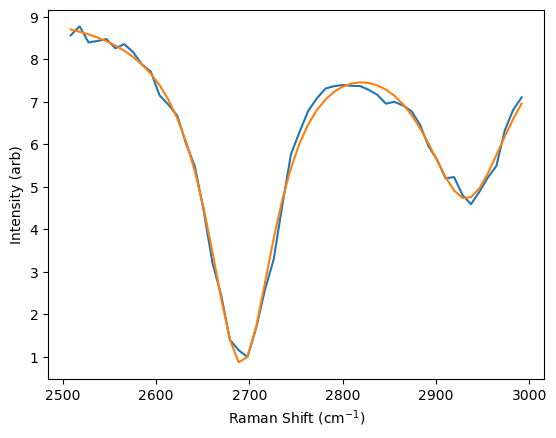

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5156e+01                                    3.77e+01    
       1              5         1.8181e+00      1.33e+01       1.91e+01       5.87e+00    
       2              8         6.8165e-01      1.14e+00       2.39e+00       6.71e-01    
       3              9         4.6136e-01      2.20e-01       4.79e+00       2.47e-01    
       4             10         2.2448e-01      2.37e-01       9.57e+00       4.52e-01    
       5             11         1.3792e-01      8.66e-02       1.91e+01       5.28e-01    
       6             13         9.9910e-02      3.80e-02       2.84e+00       5.05e-01    
       7             14         7.3710e-02      2.62e-02       2.84e+00       1.96e-01    
       8             15         6.7241e-02      6.47e-03       5.68e+00       3.03e-02    
       9             17         6.3678e-02      3.56e-03       2.84e+00       2.75e-02    

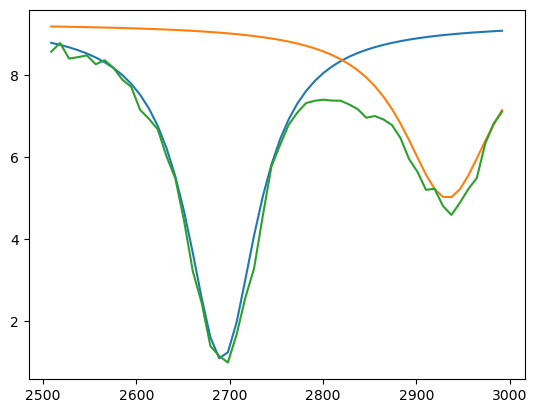

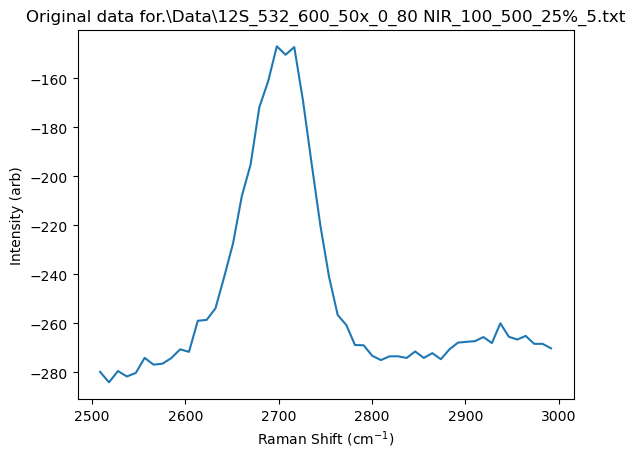

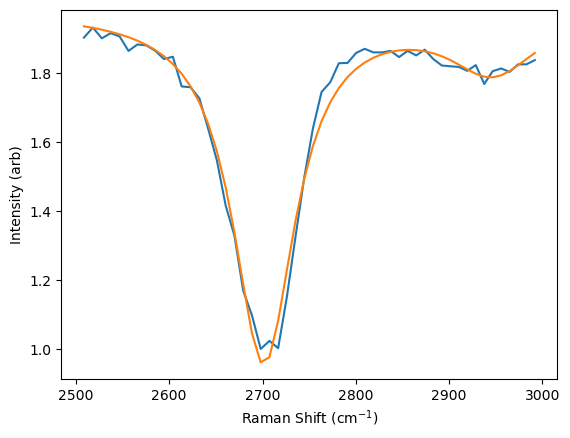

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8995e+00                                    1.19e+01    
       1              5         4.4149e-01      1.46e+00       1.85e+01       6.25e-02    
       2              6         2.7565e-01      1.66e-01       3.71e+01       1.34e+00    
       3              7         1.2667e-01      1.49e-01       7.41e+01       9.28e-01    
       4             10         1.0627e-01      2.04e-02       9.27e+00       1.45e-01    
       5             11         9.0585e-02      1.57e-02       1.85e+01       2.16e-01    
       6             13         8.2386e-02      8.20e-03       9.27e+00       1.02e-01    
       7             14         7.0029e-02      1.24e-02       1.85e+01       2.06e-01    
       8             16         6.7510e-02      2.52e-03       9.27e+00       2.01e-01    
       9             17         5.8302e-02      9.21e-03       9.27e+00       8.77e-02    

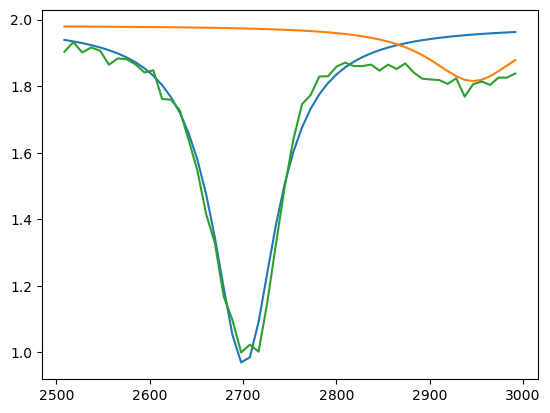

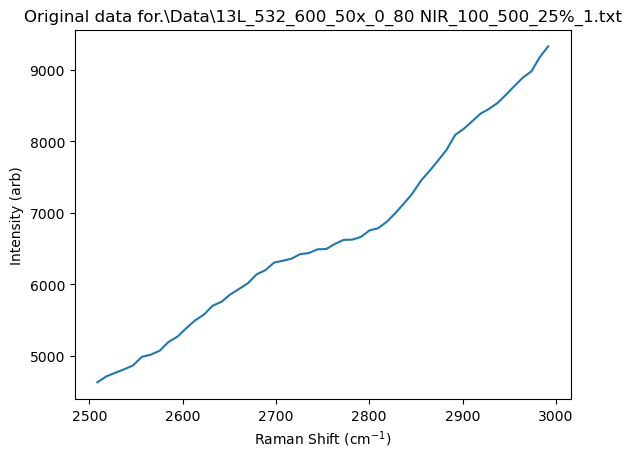

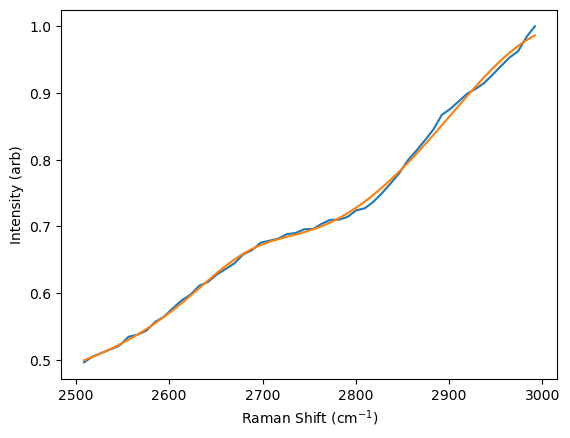

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3204e+00                                    1.01e+01    
       1              5         4.1046e-01      9.10e-01       1.66e+01       6.35e-01    
       2              6         1.9724e-01      2.13e-01       3.32e+01       3.90e-01    
       3              7         1.0029e-01      9.69e-02       6.64e+01       3.14e-01    
       4              9         8.2649e-02      1.76e-02       3.32e+01       5.22e-01    
       5             10         7.3886e-02      8.76e-03       3.32e+01       6.84e-01    
       6             11         5.2064e-02      2.18e-02       3.32e+01       7.12e-01    
       7             12         3.9630e-02      1.24e-02       3.32e+01       3.66e-01    
       8             15         3.5686e-02      3.94e-03       4.15e+00       5.38e-02    
       9             16         3.2425e-02      3.26e-03       8.29e+00       1.32e-02    

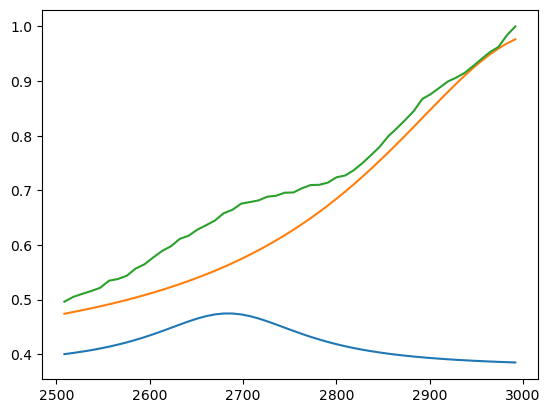

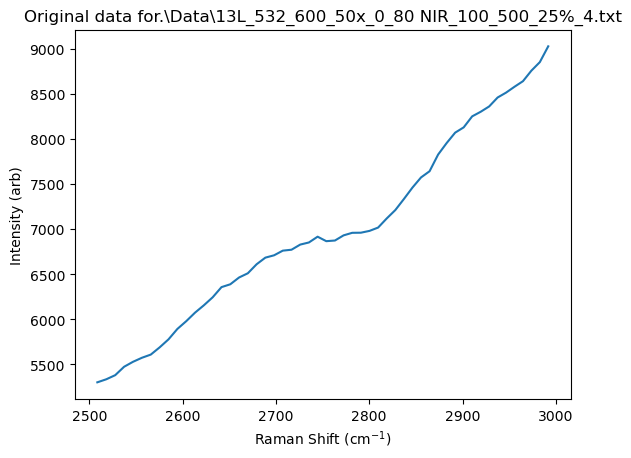

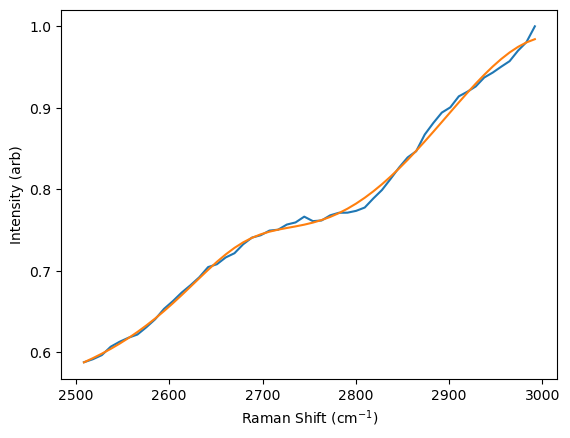

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0210e+00                                    1.25e+01    
       1              5         4.4298e-01      1.58e+00       1.81e+01       3.12e-02    
       2              6         2.8559e-01      1.57e-01       3.62e+01       1.29e+00    
       3              7         1.6529e-01      1.20e-01       7.25e+01       1.00e+00    
       4              9         1.2606e-01      3.92e-02       1.81e+01       7.81e-01    
       5             10         9.5801e-02      3.03e-02       1.81e+01       3.82e-01    
       6             11         7.9937e-02      1.59e-02       3.62e+01       8.78e-01    
       7             12         4.3766e-02      3.62e-02       3.62e+01       5.14e-02    
       8             14         3.2977e-02      1.08e-02       1.81e+01       1.83e-02    
       9             15         2.4735e-02      8.24e-03       3.62e+01       5.19e-01    

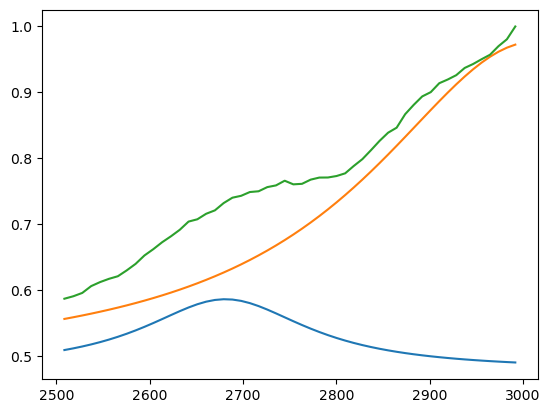

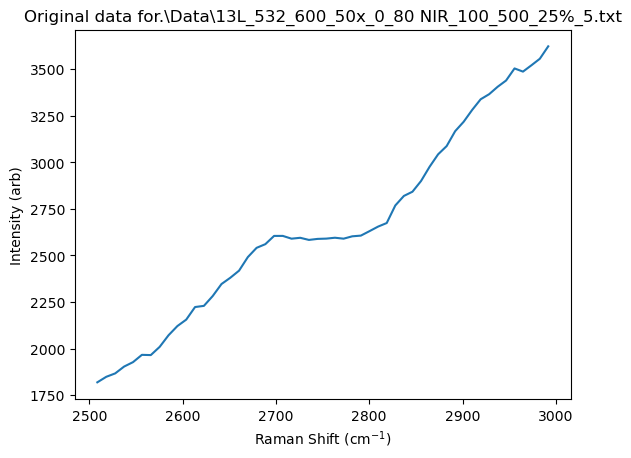

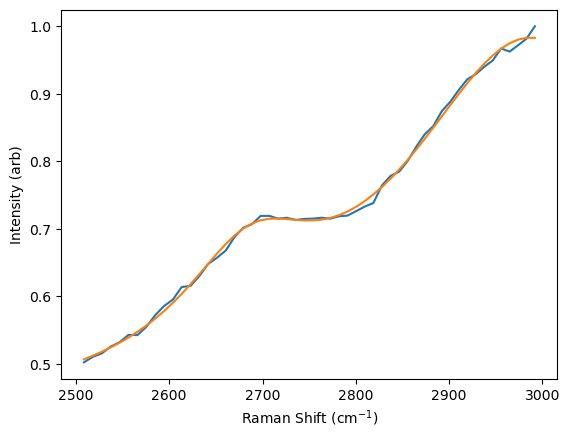

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5838e+00                                    1.08e+01    
       1              5         4.0789e-01      1.18e+00       1.84e+01       3.70e-01    
       2              6         2.3517e-01      1.73e-01       3.68e+01       7.01e-01    
       3              7         1.0276e-01      1.32e-01       7.35e+01       3.24e-01    
       4             10         9.1926e-02      1.08e-02       9.19e+00       9.02e-02    
       5             11         7.8388e-02      1.35e-02       1.84e+01       2.54e-01    
       6             12         6.9112e-02      9.28e-03       3.68e+01       8.39e-01    
       7             13         4.3760e-02      2.54e-02       3.68e+01       3.72e-01    
       8             15         3.5274e-02      8.49e-03       1.84e+01       1.13e-01    
       9             17         3.2324e-02      2.95e-03       9.19e+00       5.03e-02    

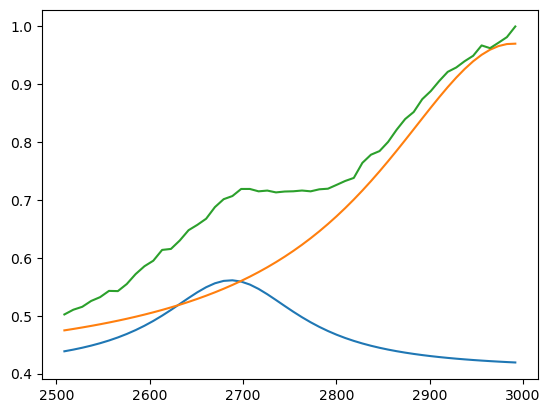

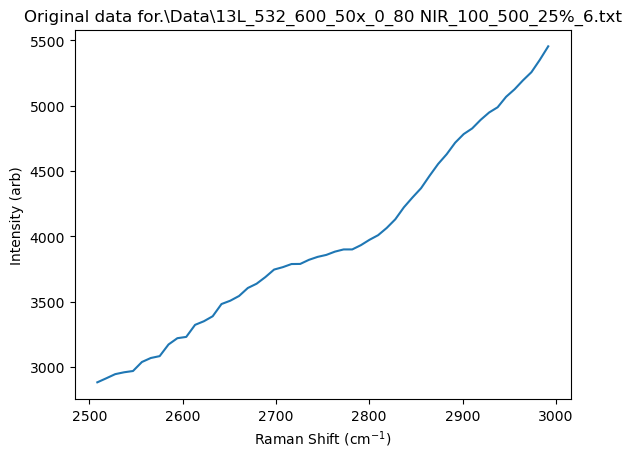

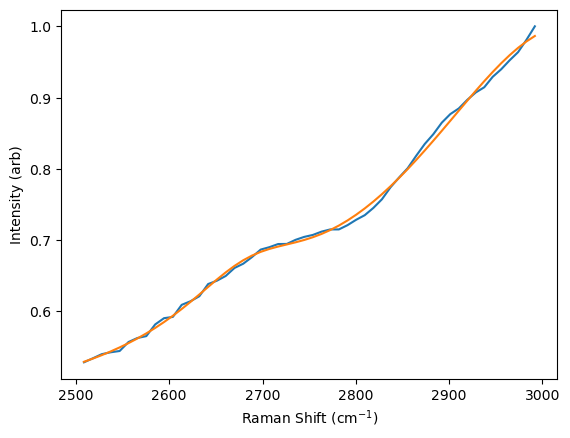

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9208e-01                                    4.09e+00    
       1              5         4.0918e-02      1.51e-01       1.11e+01       1.47e-01    
       2              8         3.0547e-02      1.04e-02       1.39e+00       9.80e-02    
       3              9         2.9169e-02      1.38e-03       2.78e+00       6.37e-02    
       4             11         2.8420e-02      7.48e-04       6.96e-01       8.91e-03    
       5             12         2.8056e-02      3.64e-04       1.39e+00       8.58e-03    
       6             13         2.7408e-02      6.49e-04       2.78e+00       2.16e-02    
       7             14         2.5841e-02      1.57e-03       5.57e+00       3.26e-02    
       8             15         2.3188e-02      2.65e-03       1.11e+01       4.91e-02    
       9             16         1.7965e-02      5.22e-03       2.23e+01       6.94e-02    

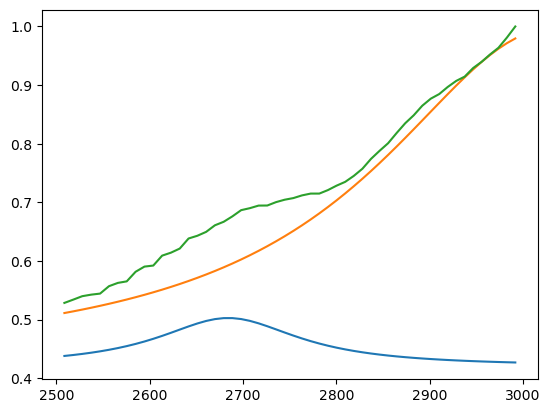

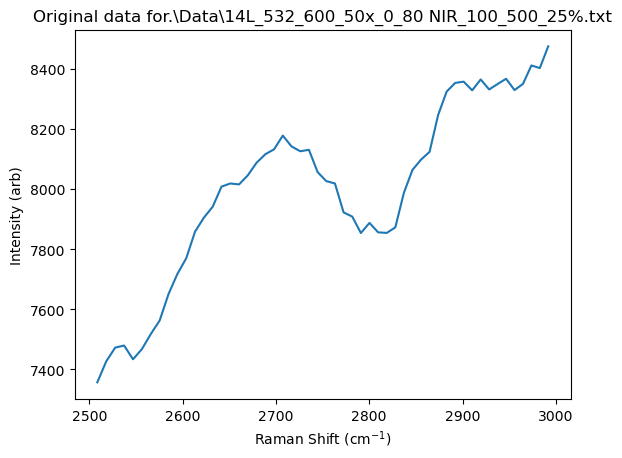

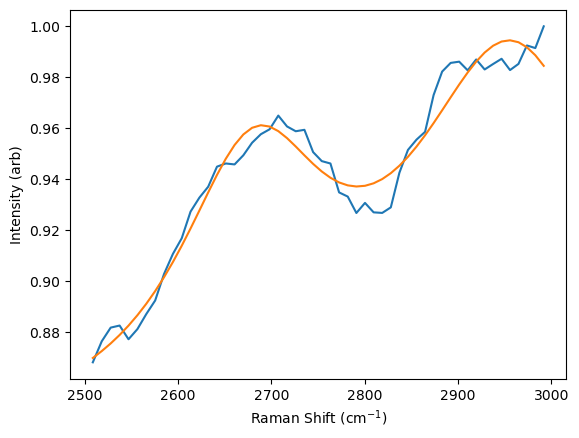

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4188e-01                                    3.46e+00    
       1              5         8.1822e-02      6.01e-02       1.19e+01       3.52e-01    
       2              7         4.8300e-02      3.35e-02       2.98e+00       3.82e-01    
       3              8         2.5214e-02      2.31e-02       2.98e+00       9.27e-02    
       4              9         2.3435e-02      1.78e-03       5.96e+00       3.14e-02    
       5             10         2.0138e-02      3.30e-03       1.19e+01       3.78e-02    
       6             11         1.6399e-02      3.74e-03       2.38e+01       6.19e-02    
       7             12         1.1077e-02      5.32e-03       4.77e+01       7.48e-02    
       8             15         1.0258e-02      8.20e-04       5.96e+00       5.37e-02    
       9             16         8.7845e-03      1.47e-03       5.96e+00       2.84e-02    

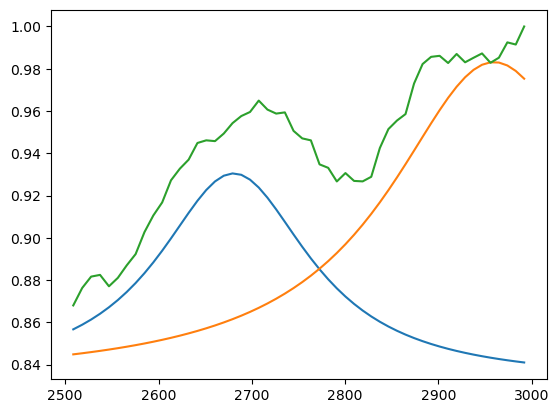

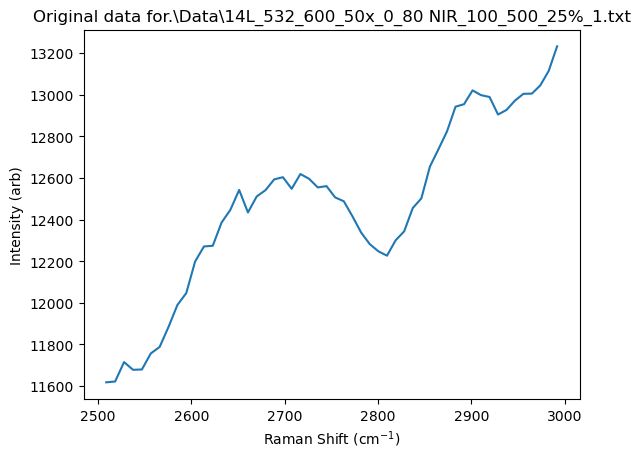

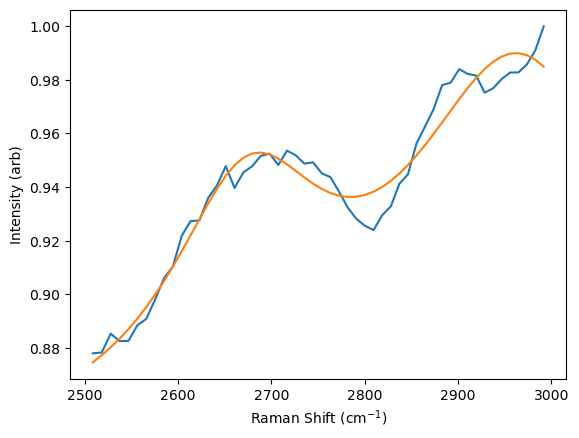

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7734e-01                                    3.89e+00    
       1              5         1.0971e-01      6.76e-02       1.16e+01       4.12e-01    
       2              7         6.7292e-02      4.24e-02       2.90e+00       4.69e-01    
       3              8         3.0057e-02      3.72e-02       2.90e+00       1.12e-01    
       4              9         2.7616e-02      2.44e-03       5.80e+00       3.05e-02    
       5             10         2.4012e-02      3.60e-03       1.16e+01       5.01e-02    
       6             11         1.8939e-02      5.07e-03       2.32e+01       6.43e-02    
       7             13         1.6072e-02      2.87e-03       1.16e+01       3.55e-02    
       8             15         1.5010e-02      1.06e-03       5.80e+00       9.05e-03    
       9             17         1.4578e-02      4.32e-04       2.90e+00       1.41e-02    

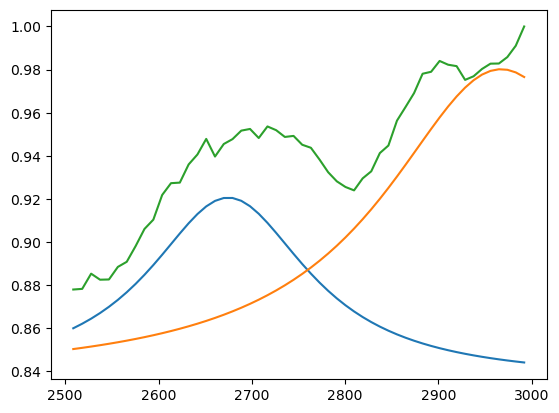

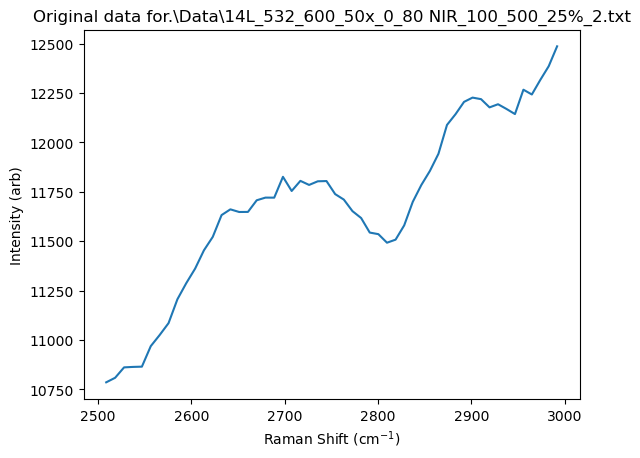

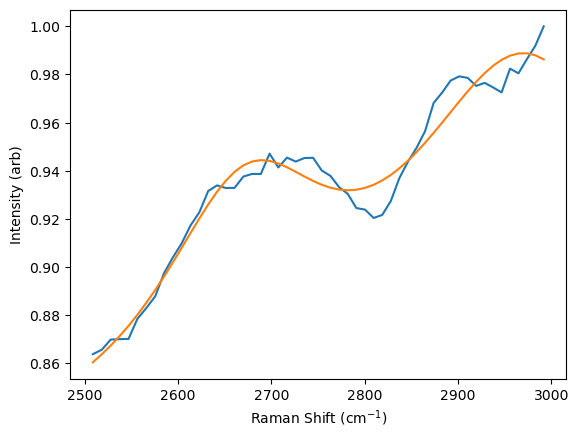

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6515e-01                                    3.77e+00    
       1              5         3.7160e-02      1.28e-01       1.09e+01       1.68e-01    
       2              8         2.6533e-02      1.06e-02       1.36e+00       7.38e-02    
       3              9         2.4746e-02      1.79e-03       2.72e+00       3.16e-02    
       4             11         2.4053e-02      6.93e-04       1.36e+00       9.06e-03    
       5             12         2.3505e-02      5.48e-04       2.72e+00       3.65e-02    
       6             14         2.2932e-02      5.73e-04       1.36e+00       4.18e-03    
       7             15         2.2379e-02      5.53e-04       2.72e+00       3.08e-02    
       8             16         2.1778e-02      6.01e-04       5.44e+00       6.84e-02    
       9             17         1.9720e-02      2.06e-03       5.44e+00       2.03e-02    

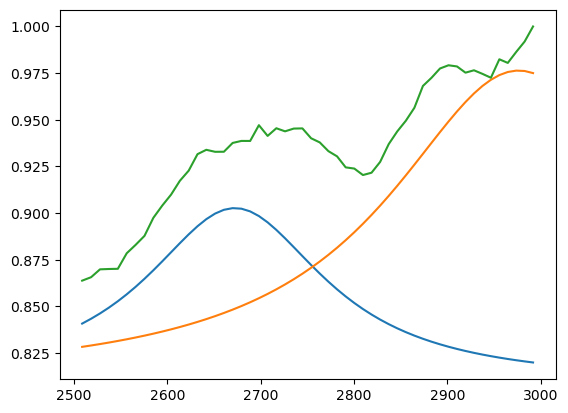

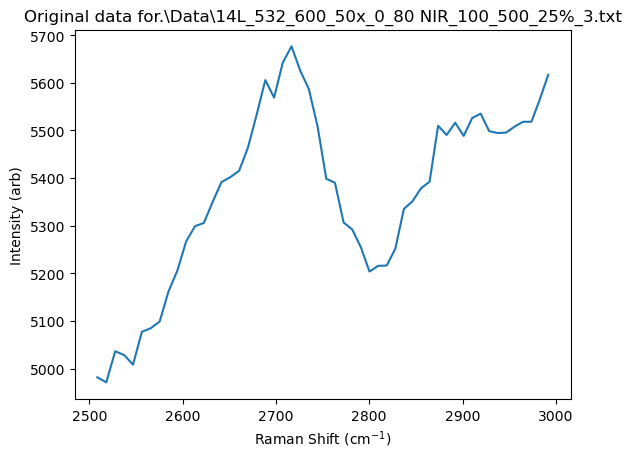

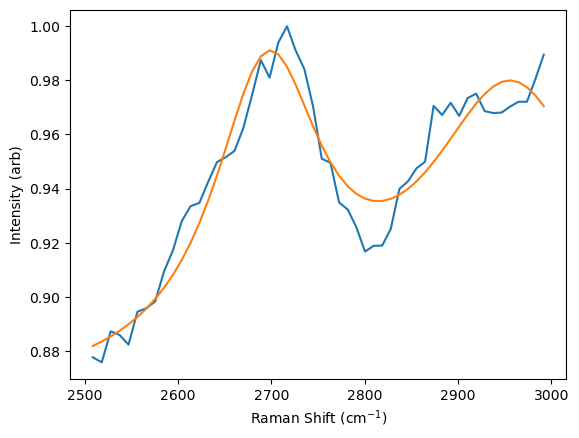

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0555e-01                                    4.18e+00    
       1              5         1.1380e-01      9.18e-02       1.16e+01       4.14e-01    
       2              7         9.1450e-02      2.23e-02       2.89e+00       5.64e-01    
       3              8         3.5877e-02      5.56e-02       2.89e+00       1.42e-01    
       4              9         3.2381e-02      3.50e-03       5.79e+00       5.47e-02    
       5             10         3.1615e-02      7.66e-04       1.16e+01       1.25e-01    
       6             11         2.4692e-02      6.92e-03       1.16e+01       9.82e-02    
       7             12         2.0137e-02      4.56e-03       2.32e+01       8.10e-02    
       8             15         1.8459e-02      1.68e-03       2.89e+00       4.74e-03    
       9             16         1.7198e-02      1.26e-03       5.79e+00       1.31e-02    

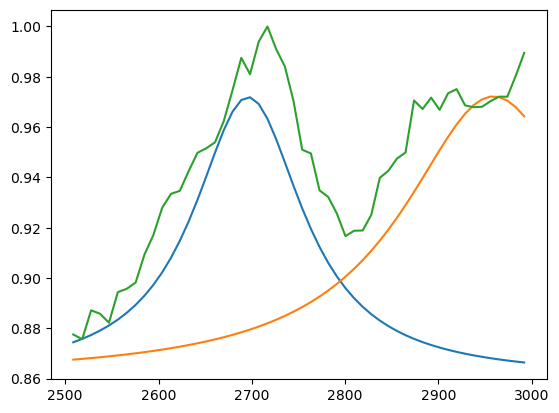

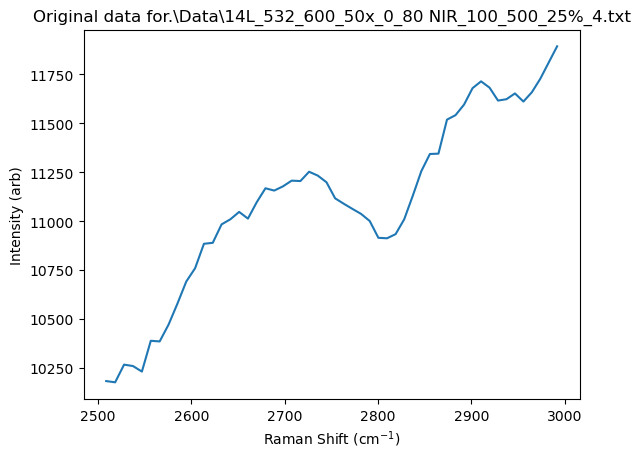

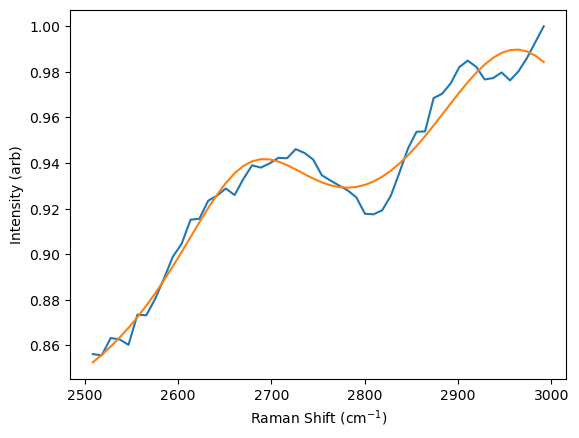

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.5225e-01                                    7.92e+00    
       1              5         2.7246e-01      4.80e-01       1.33e+01       6.01e-01    
       2              8         1.3735e-01      1.35e-01       1.66e+00       1.74e-01    
       3              9         1.3123e-01      6.13e-03       3.32e+00       2.96e-02    
       4             11         1.2844e-01      2.79e-03       1.66e+00       2.65e-02    
       5             12         1.2407e-01      4.37e-03       3.32e+00       4.58e-02    
       6             13         1.1428e-01      9.78e-03       6.63e+00       7.66e-02    
       7             14         9.4619e-02      1.97e-02       1.33e+01       1.22e-01    
       8             15         6.1031e-02      3.36e-02       2.65e+01       1.89e-01    
       9             16         1.9685e-02      4.13e-02       5.31e+01       3.06e-01    

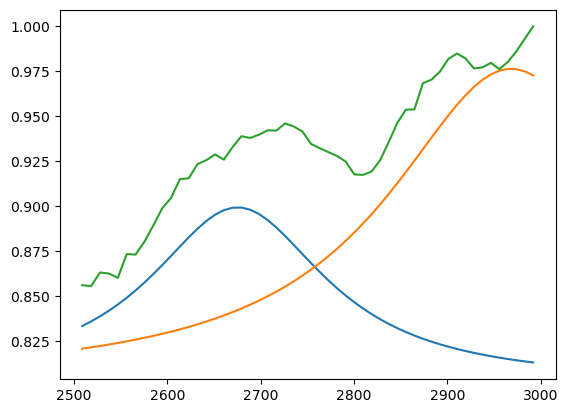

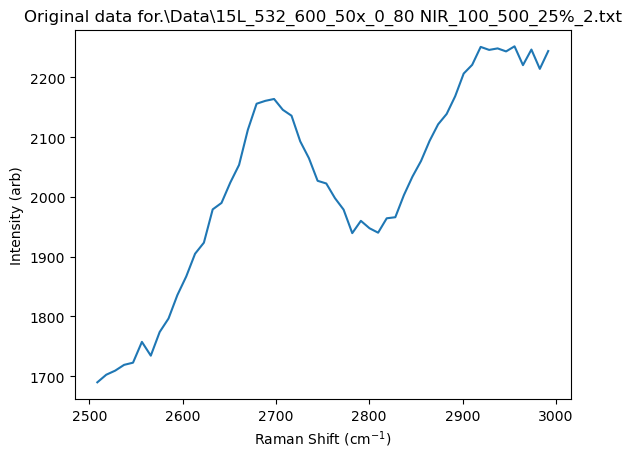

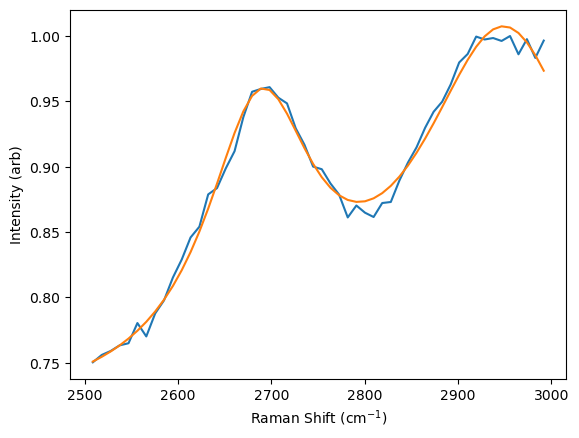

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.6630e+00                                    1.76e+01    
       1              5         7.0787e-01      2.96e+00       1.25e+01       1.72e-01    
       2              8         6.6142e-01      4.65e-02       1.56e+00       2.66e-02    
       3              9         6.4813e-01      1.33e-02       3.13e+00       8.47e-02    
       4             10         6.2108e-01      2.70e-02       6.25e+00       2.09e-01    
       5             11         5.3860e-01      8.25e-02       1.25e+01       2.89e-01    
       6             12         3.8733e-01      1.51e-01       2.50e+01       4.87e-01    
       7             13         1.5662e-01      2.31e-01       5.00e+01       9.70e-01    
       8             14         6.1753e-02      9.49e-02       7.34e+01       1.96e+00    
       9             15         7.3039e-03      5.44e-02       4.16e+01       3.33e-01    

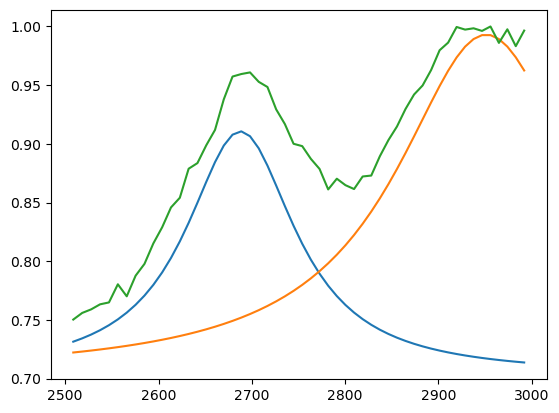

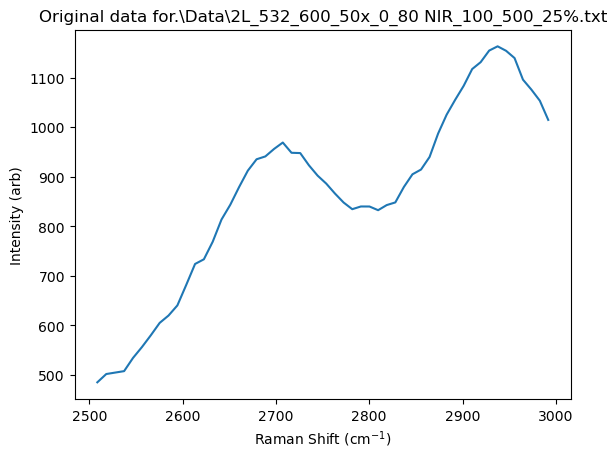

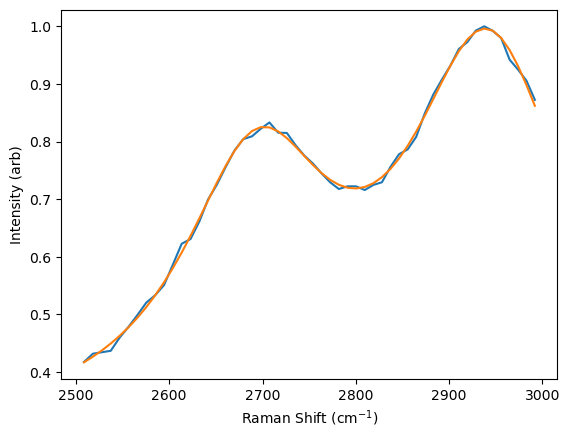

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0304e+00                                    1.61e+01    
       1              5         5.7966e-01      2.45e+00       1.18e+01       1.99e-01    
       2              8         5.3197e-01      4.77e-02       1.47e+00       3.44e-02    
       3              9         5.2112e-01      1.08e-02       2.95e+00       5.49e-02    
       4             10         5.0336e-01      1.78e-02       5.90e+00       1.90e-01    
       5             11         4.4165e-01      6.17e-02       1.18e+01       2.44e-01    
       6             12         3.2857e-01      1.13e-01       2.36e+01       4.46e-01    
       7             13         2.1166e-01      1.17e-01       4.72e+01       7.33e-01    
       8             15         6.4239e-02      1.47e-01       2.36e+01       4.19e-01    
       9             16         3.3153e-02      3.11e-02       3.87e+01       6.66e-01    

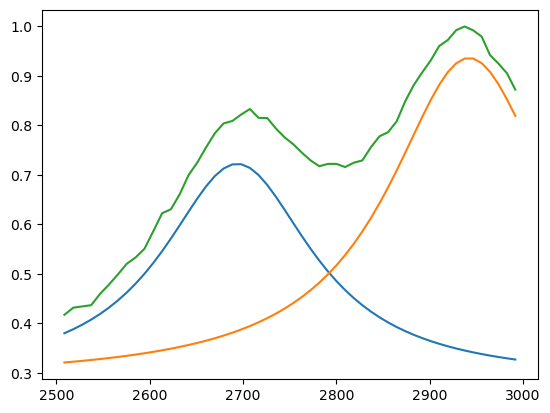

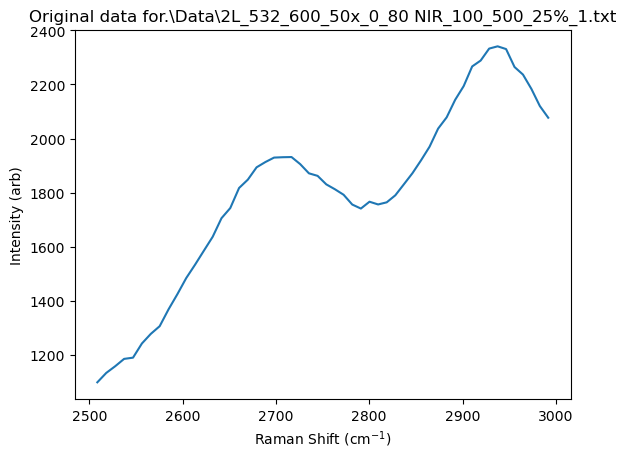

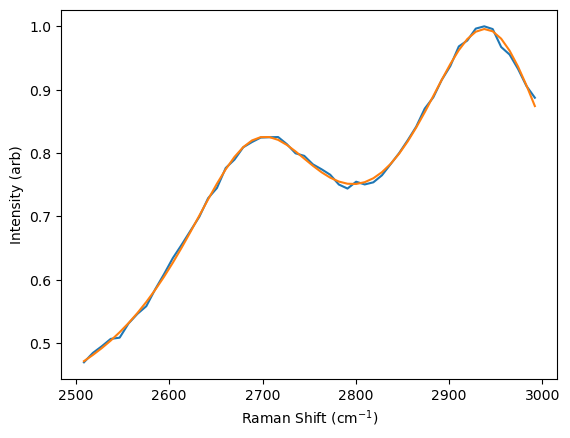

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.1791e+00                                    1.64e+01    
       1              5         6.3029e-01      2.55e+00       1.21e+01       2.00e-01    
       2              8         5.7397e-01      5.63e-02       1.52e+00       4.19e-02    
       3              9         5.6226e-01      1.17e-02       3.03e+00       6.46e-02    
       4             10         5.4380e-01      1.85e-02       6.06e+00       2.12e-01    
       5             11         4.7180e-01      7.20e-02       1.21e+01       2.51e-01    
       6             12         3.4534e-01      1.26e-01       2.43e+01       4.64e-01    
       7             13         1.4745e-01      1.98e-01       4.85e+01       7.29e-01    
       8             14         6.2836e-02      8.46e-02       8.13e+01       1.98e+00    
       9             15         1.2476e-02      5.04e-02       5.46e+01       5.05e-01    

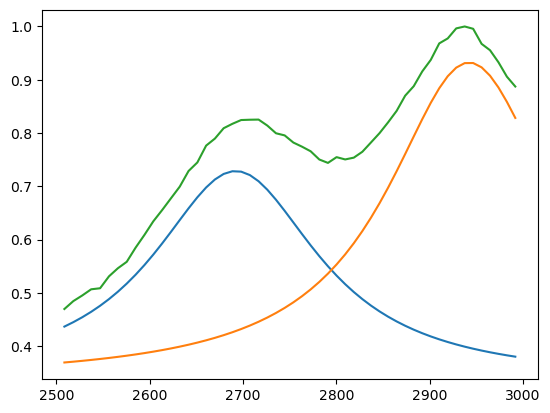

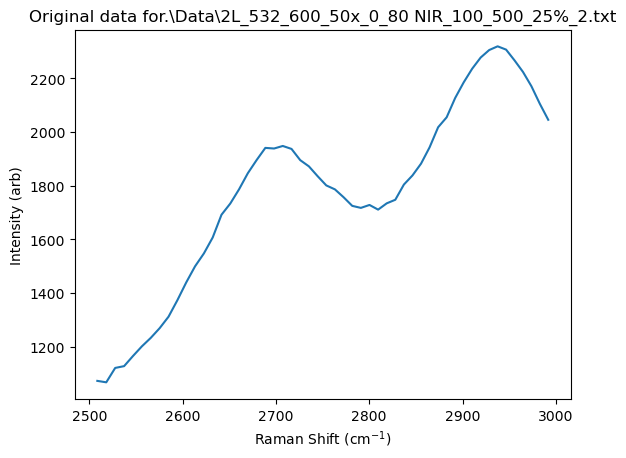

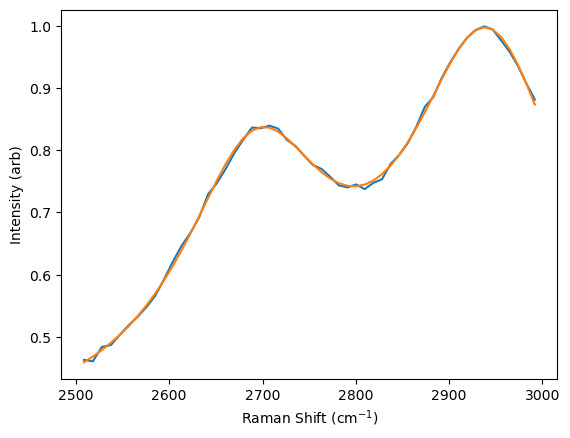

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0075e+00                                    1.60e+01    
       1              5         5.8778e-01      2.42e+00       1.18e+01       1.45e-01    
       2              8         5.5059e-01      3.72e-02       1.48e+00       3.14e-02    
       3              9         5.4108e-01      9.51e-03       2.96e+00       6.69e-02    
       4             10         5.2325e-01      1.78e-02       5.92e+00       1.93e-01    
       5             11         4.5932e-01      6.39e-02       1.18e+01       2.48e-01    
       6             12         3.3846e-01      1.21e-01       2.37e+01       4.53e-01    
       7             13         1.5445e-01      1.84e-01       4.74e+01       3.70e-01    
       8             14         9.4770e-02      5.97e-02       9.48e+01       2.50e+00    
       9             15         2.1839e-02      7.29e-02       5.41e+01       9.06e-01    

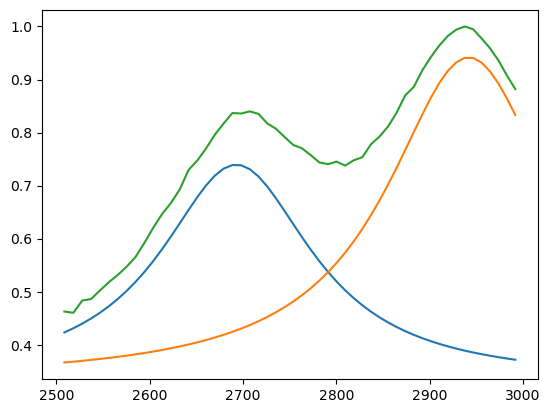

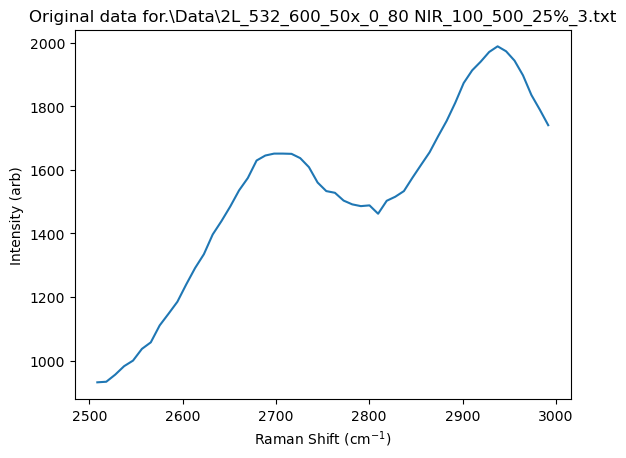

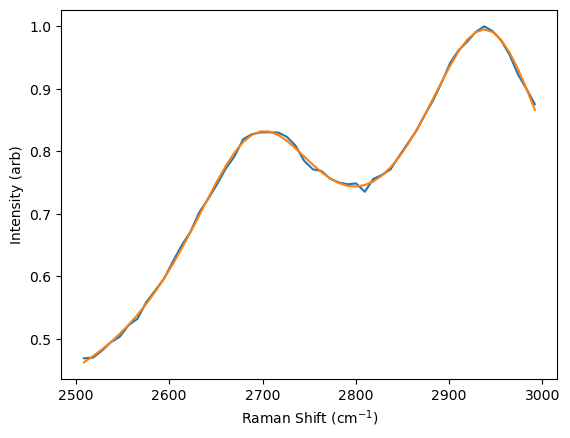

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8380e+00                                    1.55e+01    
       1              5         5.8541e-01      2.25e+00       1.20e+01       2.38e-01    
       2              8         5.2139e-01      6.40e-02       1.51e+00       4.63e-02    
       3              9         5.0984e-01      1.16e-02       3.01e+00       5.24e-02    
       4             10         4.9389e-01      1.59e-02       6.02e+00       2.07e-01    
       5             11         4.3082e-01      6.31e-02       1.20e+01       2.33e-01    
       6             12         3.1694e-01      1.14e-01       2.41e+01       4.48e-01    
       7             13         1.7415e-01      1.43e-01       4.82e+01       5.70e-01    
       8             15         5.0227e-02      1.24e-01       2.41e+01       9.92e-01    
       9             16         1.2680e-02      3.75e-02       3.75e+01       3.56e-01    

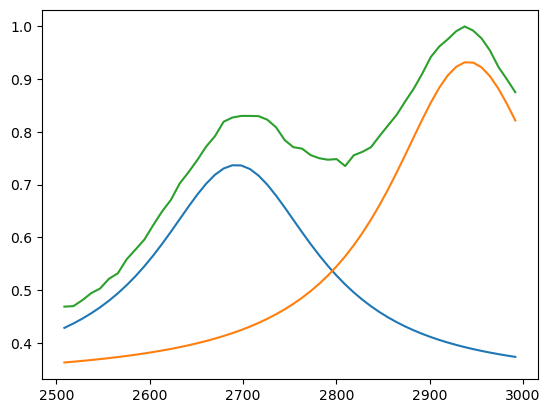

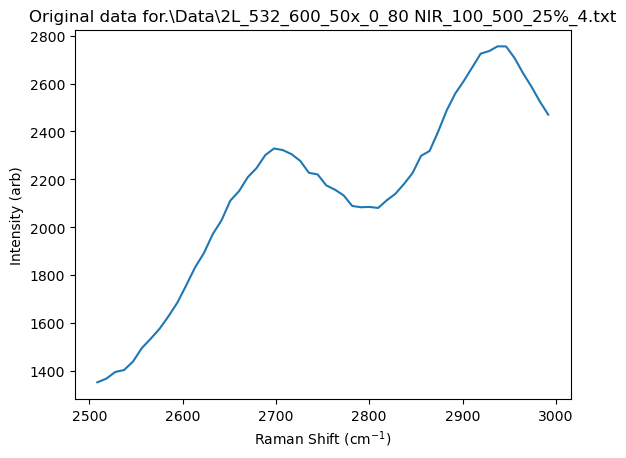

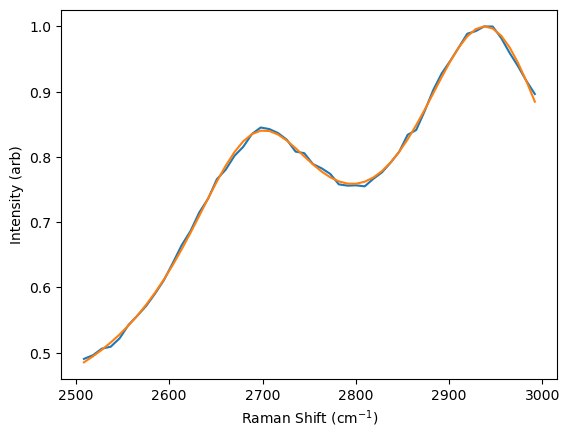

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5419e+00                                    1.74e+01    
       1              5         6.4481e-01      2.90e+00       1.22e+01       2.05e-01    
       2              8         6.1693e-01      2.79e-02       1.53e+00       1.41e-02    
       3              9         6.0681e-01      1.01e-02       3.06e+00       7.93e-02    
       4             10         5.8476e-01      2.21e-02       6.11e+00       1.88e-01    
       5             11         5.1560e-01      6.92e-02       1.22e+01       2.68e-01    
       6             12         3.8645e-01      1.29e-01       2.45e+01       4.65e-01    
       7             13         1.7362e-01      2.13e-01       4.89e+01       9.20e-01    
       8             14         6.1065e-02      1.13e-01       8.49e+01       1.83e+00    
       9             15         3.4690e-02      2.64e-02       7.85e+01       8.18e-01    

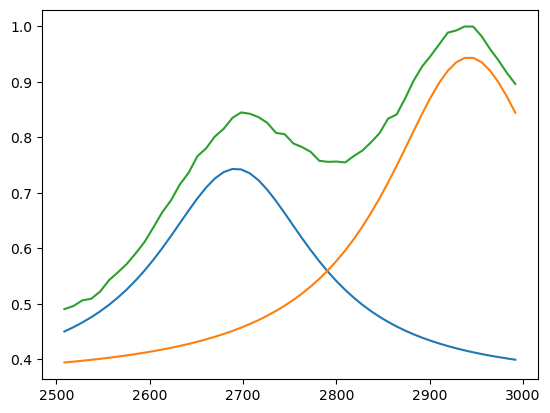

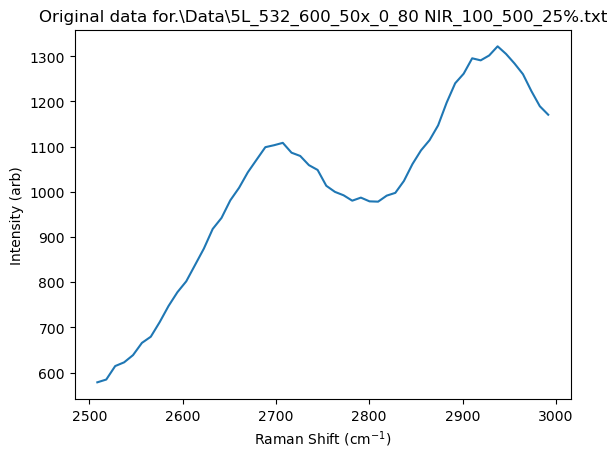

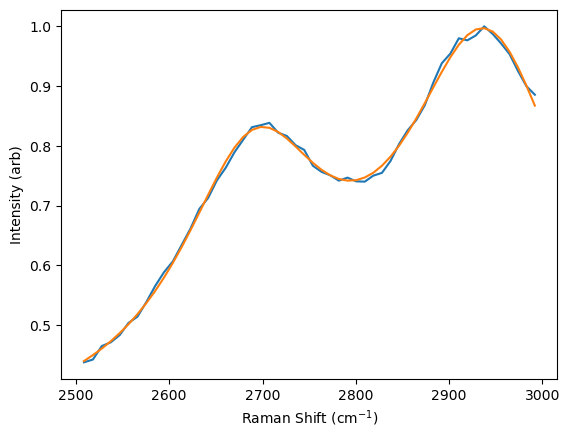

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5089e+00                                    1.46e+01    
       1              5         5.9594e-01      1.91e+00       1.23e+01       4.60e-01    
       2              8         4.6468e-01      1.31e-01       1.54e+00       7.47e-02    
       3              9         4.5070e-01      1.40e-02       3.08e+00       4.16e-02    
       4             10         4.3224e-01      1.85e-02       6.16e+00       1.80e-01    
       5             11         3.7409e-01      5.81e-02       1.23e+01       2.31e-01    
       6             12         2.7687e-01      9.72e-02       2.46e+01       4.09e-01    
       7             14         2.1119e-01      6.57e-02       1.23e+01       8.84e-02    
       8             15         1.3380e-01      7.74e-02       2.46e+01       2.30e-01    
       9             16         4.1288e-02      9.25e-02       4.93e+01       3.71e-01    

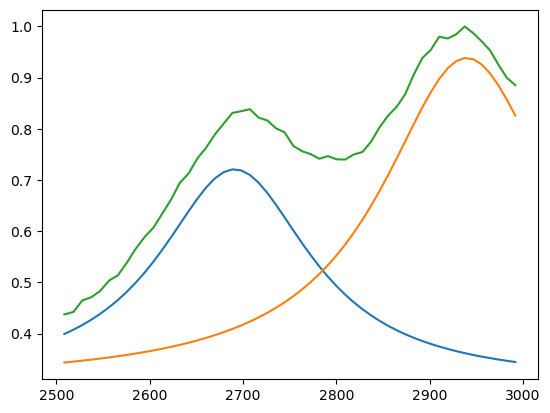

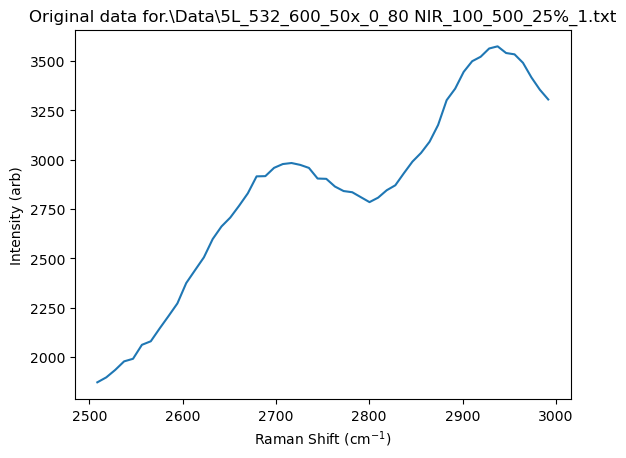

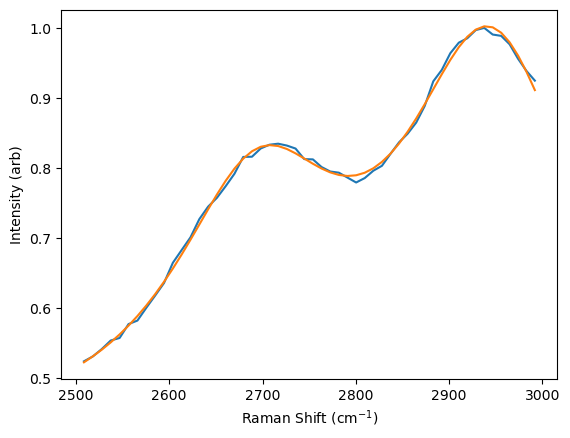

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4426e+00                                    1.44e+01    
       1              5         5.6519e-01      1.88e+00       1.22e+01       4.19e-01    
       2              8         4.4263e-01      1.23e-01       1.52e+00       6.75e-02    
       3              9         4.2925e-01      1.34e-02       3.04e+00       3.80e-02    
       4             10         4.1371e-01      1.55e-02       6.08e+00       1.92e-01    
       5             11         3.5634e-01      5.74e-02       1.22e+01       2.12e-01    
       6             12         2.9568e-01      6.07e-02       2.43e+01       4.43e-01    
       7             13         1.9350e-01      1.02e-01       4.87e+01       6.71e-01    
       8             14         6.9041e-02      1.24e-01       4.87e+01       1.01e-01    
       9             15         3.5311e-02      3.37e-02       5.65e+01       5.50e-01    

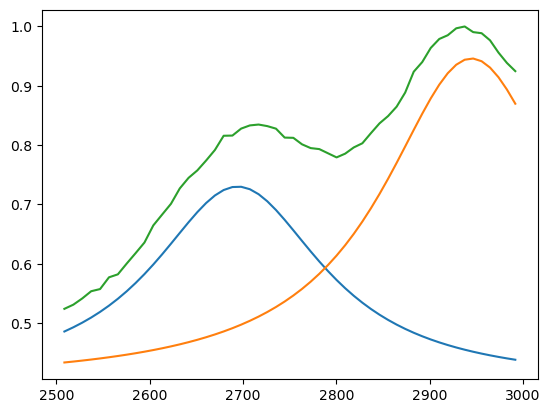

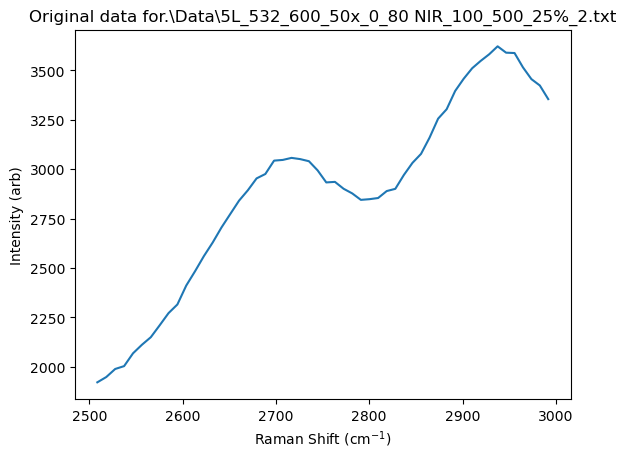

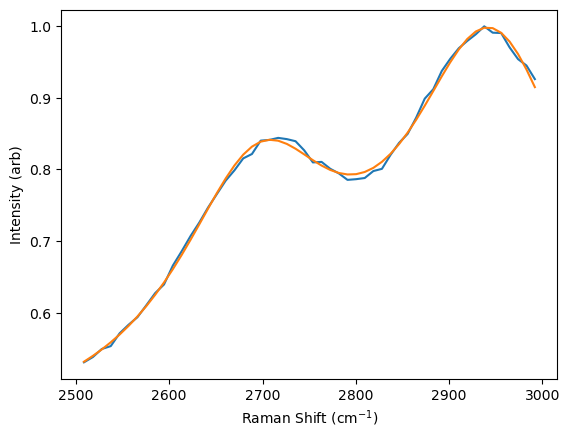

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7992e+00                                    1.54e+01    
       1              5         6.4019e-01      2.16e+00       1.34e+01       4.85e-01    
       2              7         5.2458e-01      1.16e-01       6.71e+00       5.02e-01    
       3              8         4.6528e-01      5.93e-02       6.71e+00       2.26e-01    
       4              9         4.0867e-01      5.66e-02       1.34e+01       2.71e-01    
       5             10         3.3305e-01      7.56e-02       2.68e+01       4.45e-01    
       6             11         2.4017e-01      9.29e-02       5.37e+01       1.06e+00    
       7             12         7.5120e-02      1.65e-01       5.37e+01       2.97e-01    
       8             13         3.2850e-02      4.23e-02       5.84e+01       4.50e-01    
       9             14         1.7564e-02      1.53e-02       1.07e+02       7.79e-01    

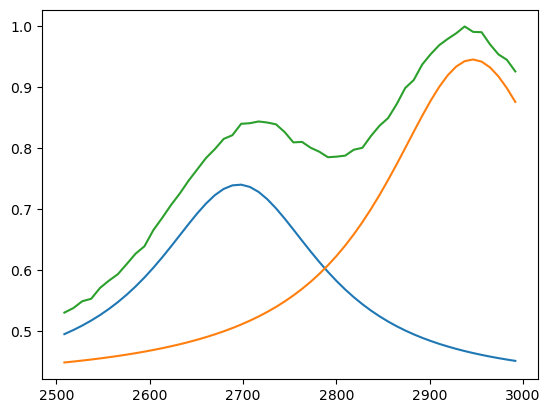

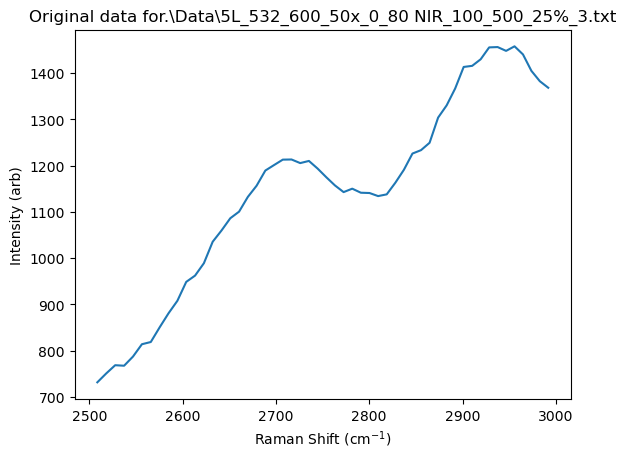

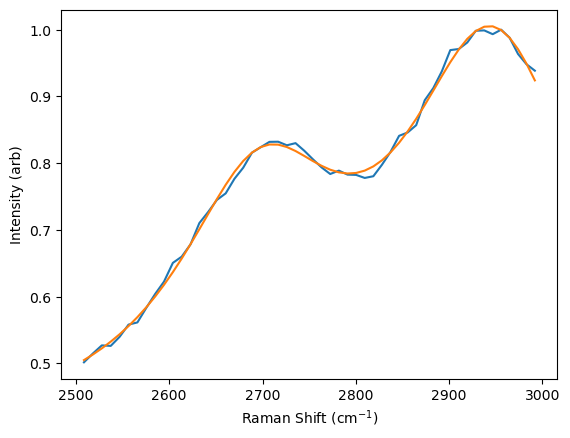

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0638e+00                                    1.62e+01    
       1              5         6.1866e-01      2.45e+00       1.20e+01       2.80e-01    
       2              8         5.4371e-01      7.49e-02       1.50e+00       4.62e-02    
       3              9         5.3034e-01      1.34e-02       2.99e+00       5.02e-02    
       4             10         5.1188e-01      1.85e-02       5.99e+00       2.03e-01    
       5             11         4.4481e-01      6.71e-02       1.20e+01       2.40e-01    
       6             12         3.4299e-01      1.02e-01       2.40e+01       4.55e-01    
       7             13         1.7382e-01      1.69e-01       4.79e+01       7.99e-01    
       8             14         5.2560e-02      1.21e-01       8.37e+01       3.75e-01    
       9             15         2.0439e-02      3.21e-02       9.58e+01       6.88e-01    

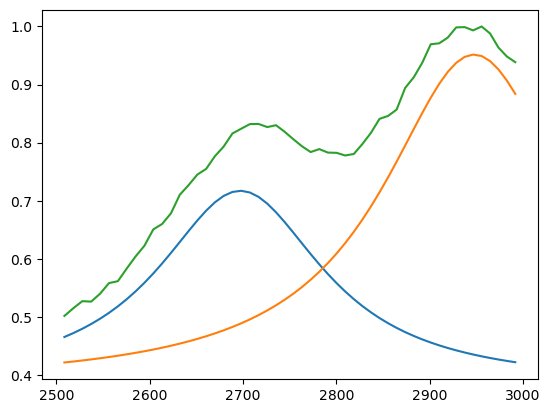

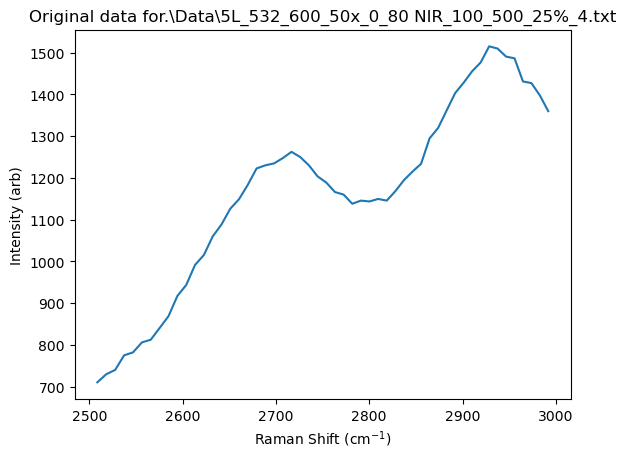

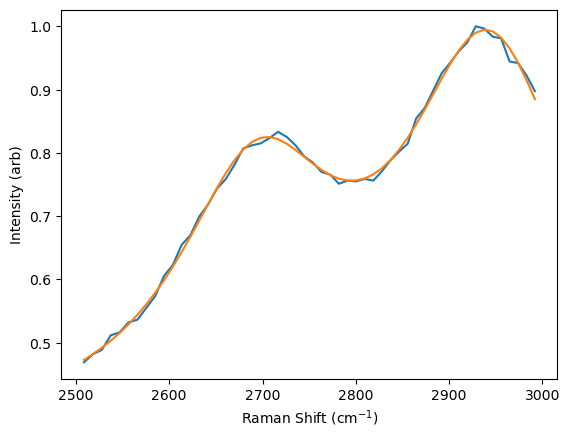

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8283e+00                                    1.56e+01    
       1              5         5.2700e-01      2.30e+00       1.21e+01       1.91e-01    
       2              8         4.7803e-01      4.90e-02       1.52e+00       5.48e-02    
       3              9         4.6965e-01      8.38e-03       3.03e+00       7.91e-02    
       4             10         4.5044e-01      1.92e-02       6.07e+00       1.68e-01    
       5             11         3.9642e-01      5.40e-02       1.21e+01       2.33e-01    
       6             12         2.9805e-01      9.84e-02       2.43e+01       3.98e-01    
       7             13         1.3725e-01      1.61e-01       4.85e+01       6.68e-01    
       8             14         5.2759e-02      8.45e-02       9.46e+01       1.72e+00    
       9             16         5.8986e-03      4.69e-02       2.43e+01       3.06e-01    

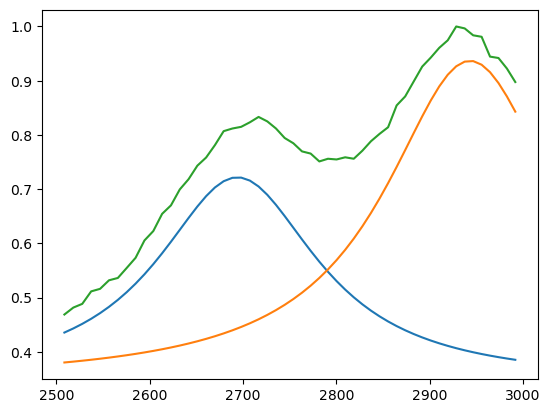

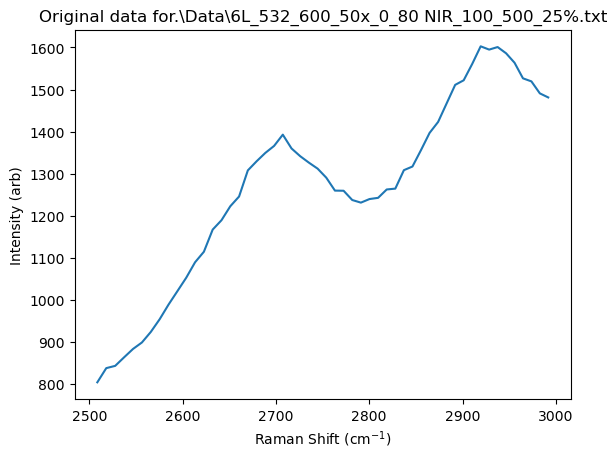

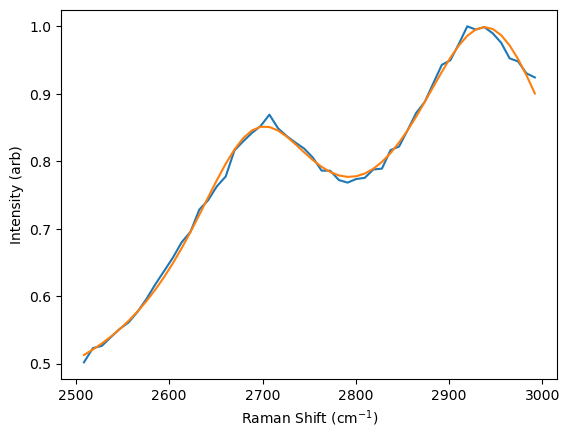

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.7798e+00                                    1.78e+01    
       1              5         7.7587e-01      3.00e+00       1.38e+01       3.49e-01    
       2              7         6.9246e-01      8.34e-02       6.89e+00       3.82e-01    
       3              8         6.2782e-01      6.46e-02       6.89e+00       1.86e-01    
       4              9         5.4732e-01      8.05e-02       1.38e+01       3.22e-01    
       5             10         4.6094e-01      8.64e-02       2.76e+01       6.83e-01    
       6             11         2.9000e-01      1.71e-01       2.76e+01       5.53e-01    
       7             14         2.5449e-01      3.55e-02       3.44e+00       1.96e-01    
       8             15         2.5271e-01      1.78e-03       6.89e+00       3.96e-01    
       9             16         2.2361e-01      2.91e-02       1.72e+00       4.43e-02    

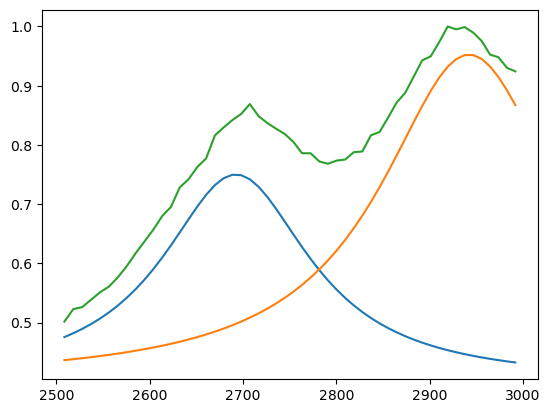

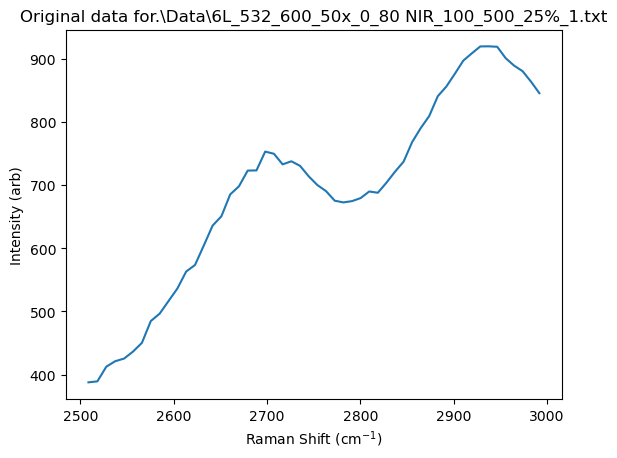

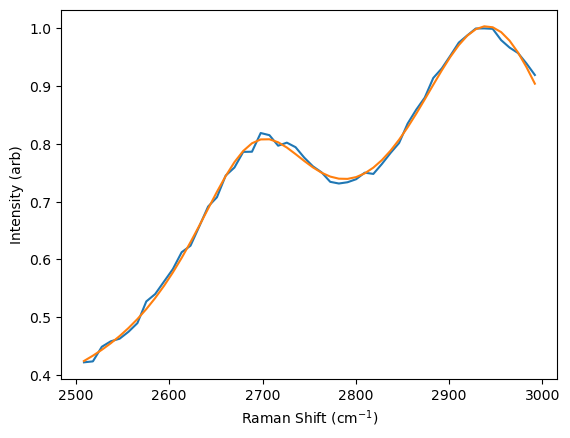

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7661e+00                                    1.53e+01    
       1              5         5.6245e-01      2.20e+00       1.29e+01       2.74e-01    
       2              8         4.9023e-01      7.22e-02       1.62e+00       5.70e-02    
       3              9         4.7826e-01      1.20e-02       3.23e+00       6.37e-02    
       4             10         4.5786e-01      2.04e-02       6.47e+00       1.92e-01    
       5             11         3.9453e-01      6.33e-02       1.29e+01       2.44e-01    
       6             12         2.7807e-01      1.16e-01       2.59e+01       4.13e-01    
       7             13         1.0764e-01      1.70e-01       5.17e+01       5.70e-01    
       8             14         4.2701e-02      6.49e-02       7.19e+01       1.70e+00    
       9             15         6.5840e-03      3.61e-02       4.74e+01       3.85e-01    

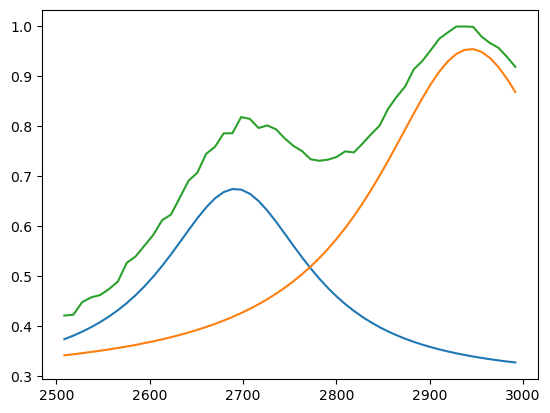

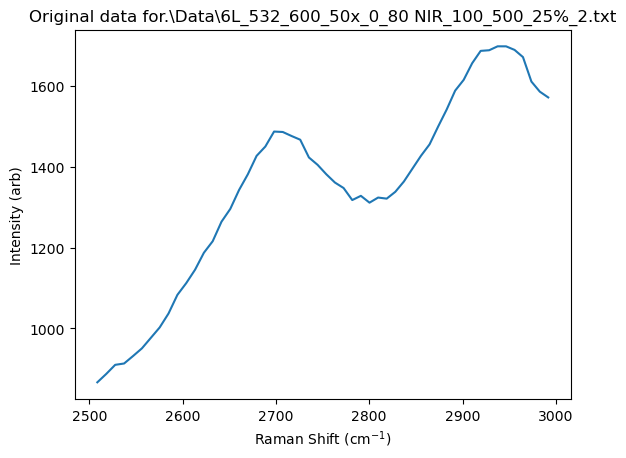

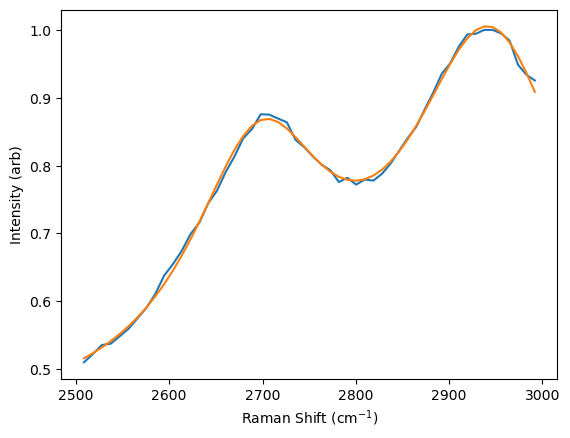

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4080e+00                                    1.71e+01    
       1              5         5.8643e-01      2.82e+00       1.20e+01       1.90e-01    
       2              8         5.6692e-01      1.95e-02       1.50e+00       3.70e-02    
       3             10         5.6413e-01      2.79e-03       7.52e-01       4.82e-03    
       4             11         5.6086e-01      3.27e-03       1.50e+00       5.69e-02    
       5             12         5.5134e-01      9.52e-03       3.01e+00       7.71e-02    
       6             13         5.2611e-01      2.52e-02       6.01e+00       1.45e-01    
       7             14         4.6549e-01      6.06e-02       1.20e+01       2.51e-01    
       8             15         3.3866e-01      1.27e-01       2.41e+01       4.10e-01    
       9             16         1.3907e-01      2.00e-01       4.81e+01       6.76e-01    

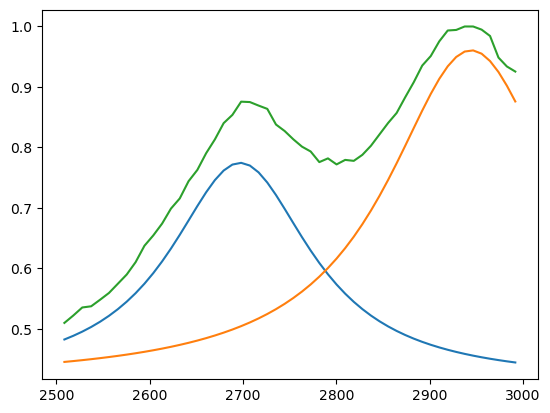

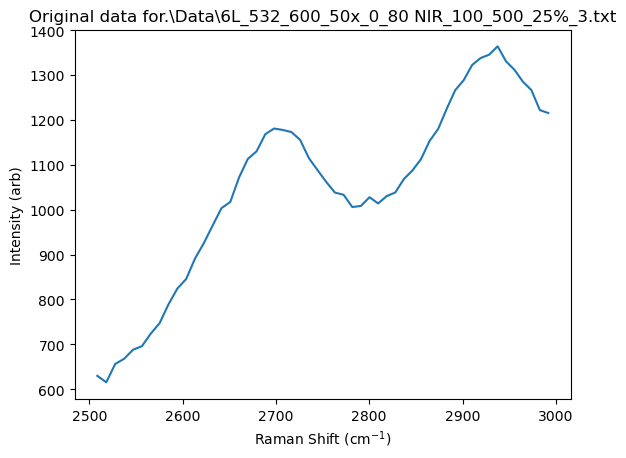

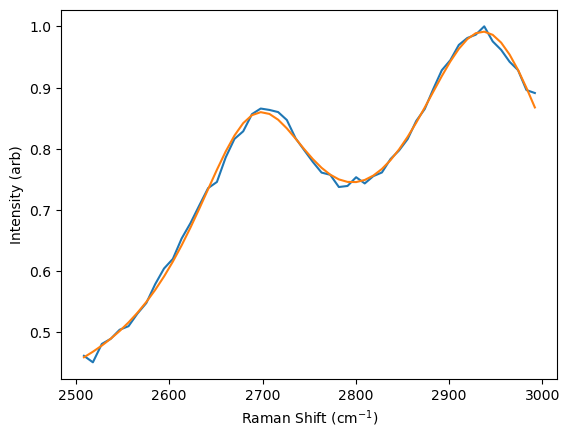

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.1501e+00                                    1.64e+01    
       1              5         5.5738e-01      2.59e+00       1.22e+01       1.89e-01    
       2              8         5.4483e-01      1.26e-02       1.52e+00       3.76e-02    
       3              9         5.4479e-01      3.68e-05       3.04e+00       2.59e-01    
       4             10         5.3329e-01      1.15e-02       7.60e-01       2.65e-02    
       5             11         5.2789e-01      5.40e-03       1.52e+00       3.05e-02    
       6             12         5.1543e-01      1.25e-02       3.04e+00       6.63e-02    
       7             13         4.8667e-01      2.88e-02       6.08e+00       1.35e-01    
       8             14         4.2227e-01      6.44e-02       1.22e+01       2.56e-01    
       9             15         2.9210e-01      1.30e-01       2.43e+01       4.08e-01    

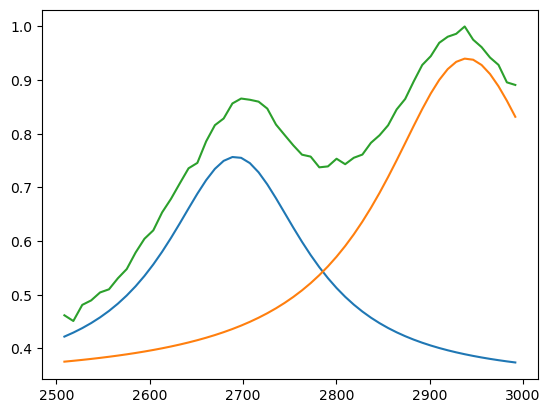

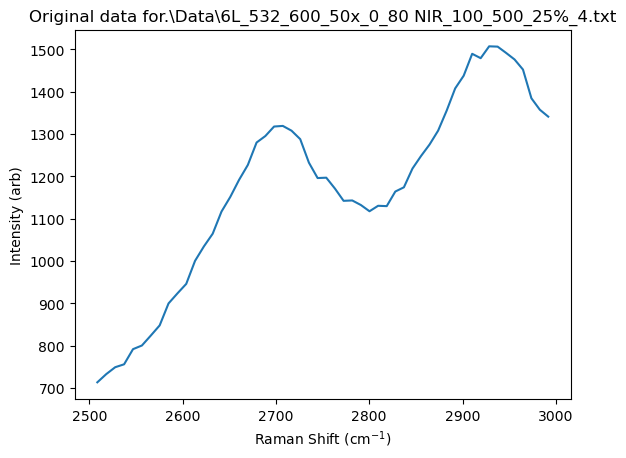

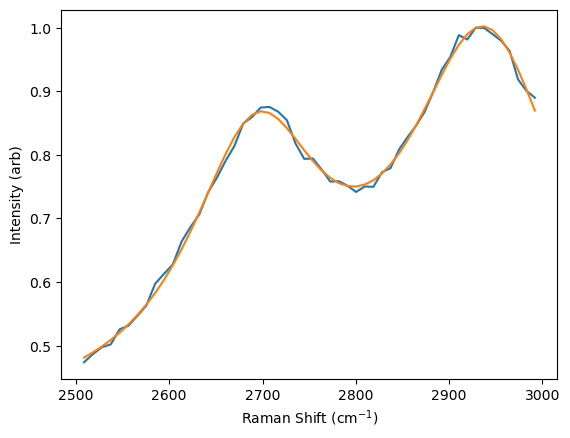

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.9331e+00                                    1.58e+01    
       1              5         5.7954e-01      2.35e+00       1.19e+01       1.97e-01    
       2              8         5.3014e-01      4.94e-02       1.49e+00       3.92e-02    
       3              9         5.1993e-01      1.02e-02       2.98e+00       6.41e-02    
       4             10         5.0190e-01      1.80e-02       5.95e+00       1.92e-01    
       5             11         4.4006e-01      6.18e-02       1.19e+01       2.43e-01    
       6             12         3.2611e-01      1.14e-01       2.38e+01       4.44e-01    
       7             13         1.7126e-01      1.55e-01       4.76e+01       4.77e-01    
       8             15         5.0172e-02      1.21e-01       2.38e+01       9.57e-01    
       9             16         1.1974e-02      3.82e-02       3.74e+01       3.12e-01    

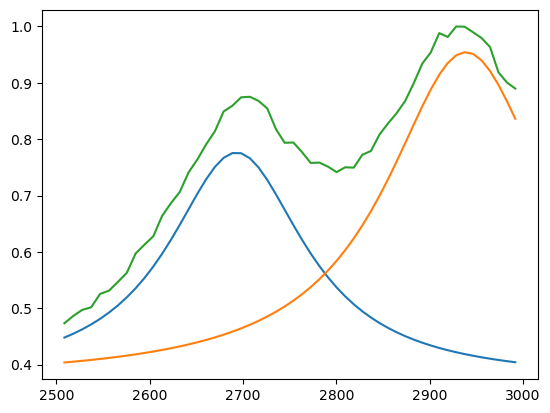

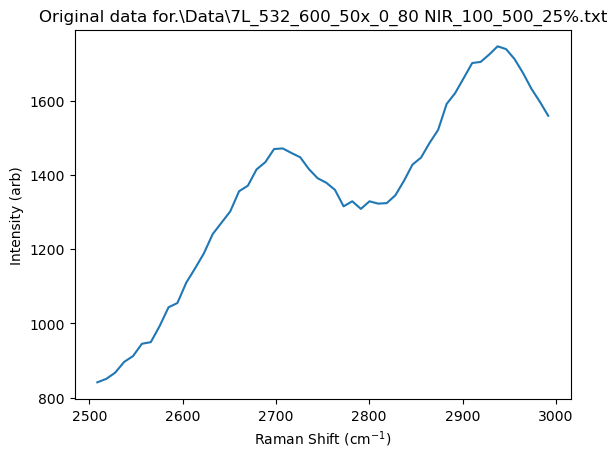

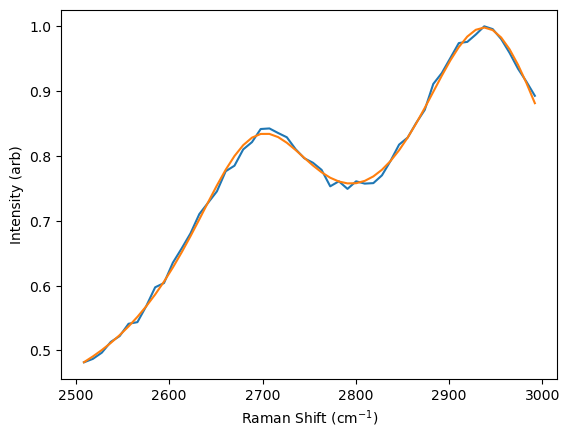

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.9736e+00                                    1.58e+01    
       1              5         6.6858e-01      2.31e+00       1.23e+01       3.93e-01    
       2              8         5.5537e-01      1.13e-01       1.54e+00       6.22e-02    
       3              9         5.4005e-01      1.53e-02       3.08e+00       4.35e-02    
       4             10         5.2015e-01      1.99e-02       6.16e+00       2.10e-01    
       5             11         4.4842e-01      7.17e-02       1.23e+01       2.52e-01    
       6             12         3.3508e-01      1.13e-01       2.46e+01       4.69e-01    
       7             13         1.5511e-01      1.80e-01       4.93e+01       8.56e-01    
       8             14         4.0293e-02      1.15e-01       8.05e+01       1.07e+00    
       9             15         2.9022e-02      1.13e-02       9.56e+01       3.33e-01    

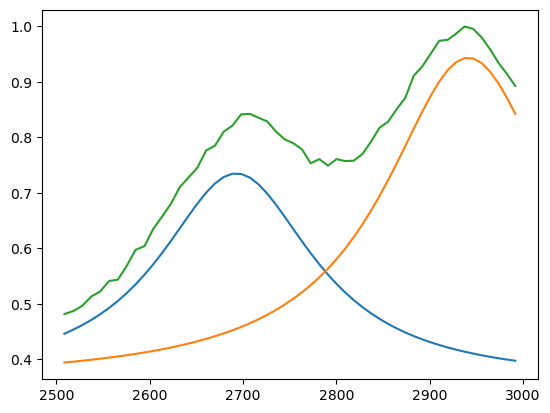

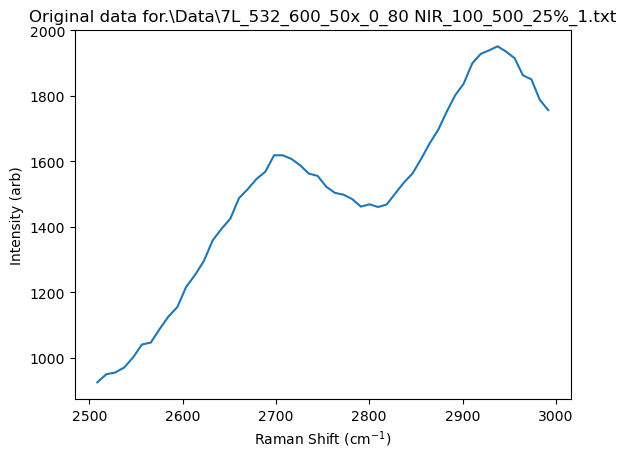

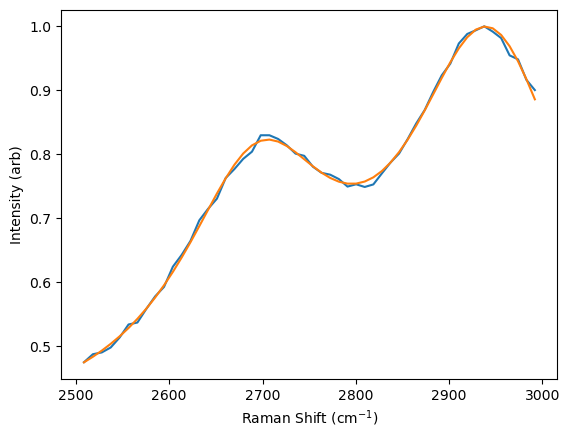

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.2942e+00                                    1.67e+01    
       1              5         6.7169e-01      2.62e+00       1.27e+01       3.11e-01    
       2              8         5.9334e-01      7.84e-02       1.59e+00       5.02e-02    
       3              9         5.7699e-01      1.64e-02       3.17e+00       4.73e-02    
       4             10         5.5506e-01      2.19e-02       6.34e+00       2.25e-01    
       5             11         4.7699e-01      7.81e-02       1.27e+01       2.69e-01    
       6             12         3.4119e-01      1.36e-01       2.54e+01       4.83e-01    
       7             13         1.9414e-01      1.47e-01       5.07e+01       7.24e-01    
       8             15         4.7740e-02      1.46e-01       2.54e+01       1.06e+00    
       9             16         1.3192e-02      3.45e-02       3.40e+01       3.89e-01    

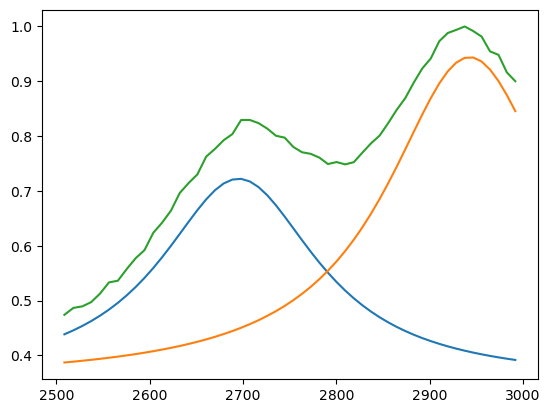

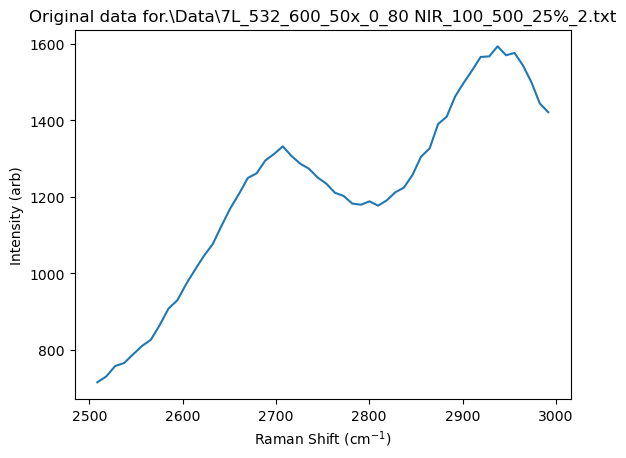

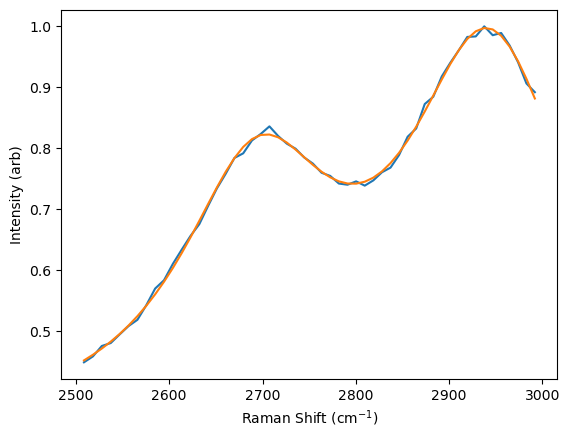

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6247e+00                                    2.18e+01    
       1              5         1.0796e+00      4.55e+00       1.32e+01       7.62e-01    
       2              8         1.0127e+00      6.69e-02       1.65e+00       1.90e-02    
       3              9         1.0033e+00      9.35e-03       3.29e+00       2.33e-01    
       4             10         9.7075e-01      3.26e-02       3.29e+00       6.10e-02    
       5             11         9.2067e-01      5.01e-02       6.59e+00       2.23e-01    
       6             12         7.9003e-01      1.31e-01       1.32e+01       3.68e-01    
       7             13         5.2858e-01      2.61e-01       2.63e+01       6.08e-01    
       8             14         1.6538e-01      3.63e-01       5.27e+01       1.17e+00    
       9             15         4.5098e-02      1.20e-01       4.74e+01       1.66e+00    

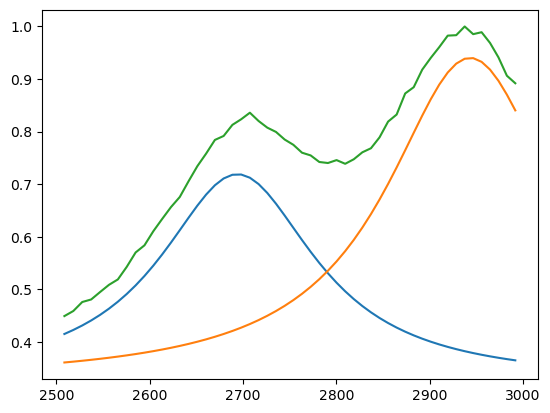

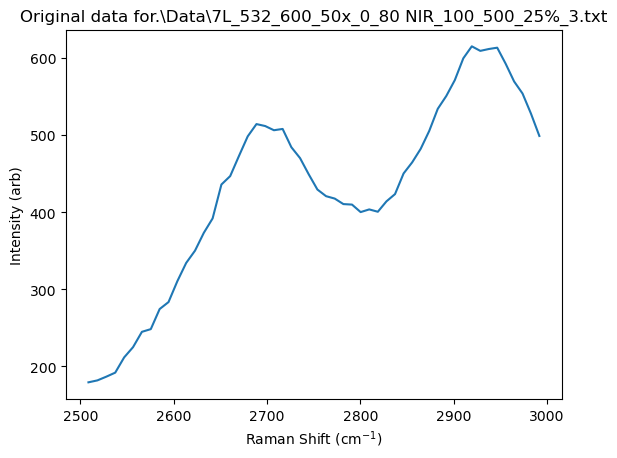

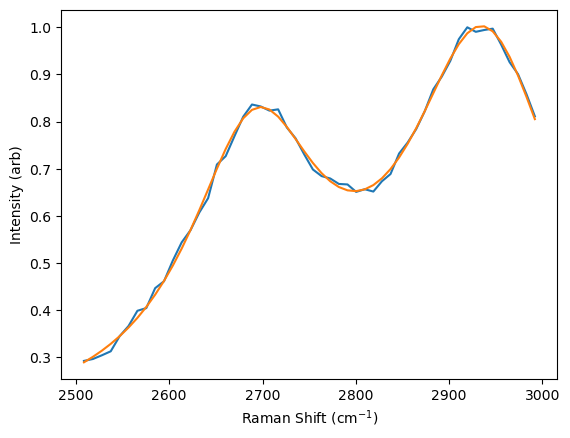

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7446e+00                                    1.52e+01    
       1              5         6.2403e-01      2.12e+00       1.20e+01       3.43e-01    
       2              8         5.1758e-01      1.06e-01       1.50e+00       5.70e-02    
       3              9         5.0428e-01      1.33e-02       3.01e+00       4.52e-02    
       4             10         4.8792e-01      1.64e-02       6.02e+00       2.14e-01    
       5             11         4.2177e-01      6.61e-02       1.20e+01       2.35e-01    
       6             12         3.0950e-01      1.12e-01       2.41e+01       4.50e-01    
       7             13         2.4780e-01      6.17e-02       4.81e+01       1.13e+00    
       8             14         1.7405e-01      7.37e-02       4.81e+01       1.81e+00    
       9             17         1.1938e-01      5.47e-02       3.01e+00       4.41e-02    

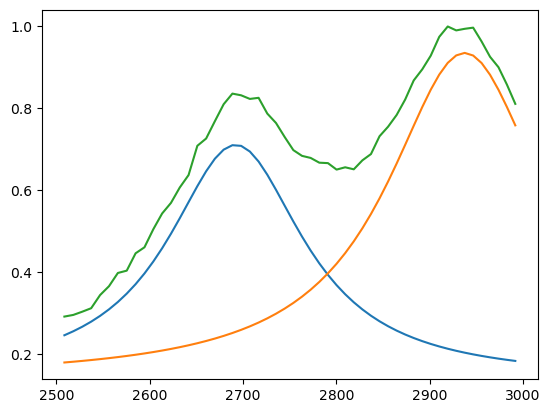

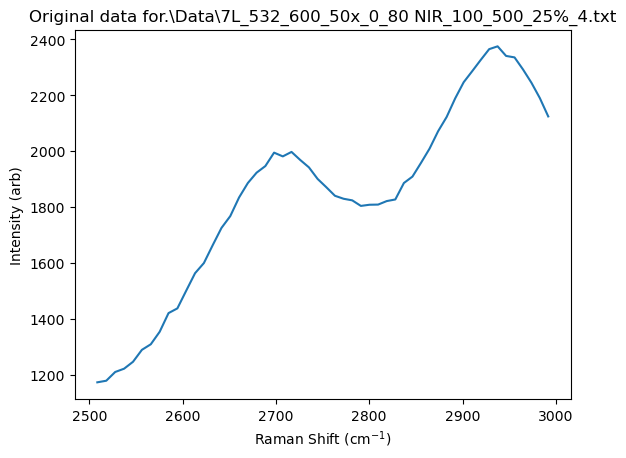

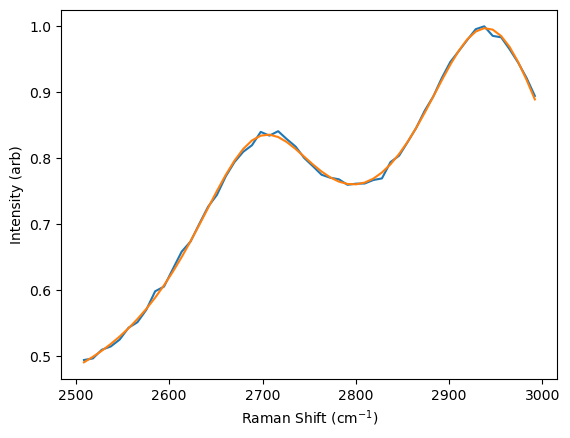

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0603e+00                                    1.61e+01    
       1              5         6.0718e-01      2.45e+00       1.33e+01       2.21e-01    
       2              7         5.6938e-01      3.78e-02       6.65e+00       3.47e-01    
       3              8         5.1495e-01      5.44e-02       6.65e+00       1.90e-01    
       4              9         4.5235e-01      6.26e-02       1.33e+01       2.88e-01    
       5             10         4.2152e-01      3.08e-02       2.66e+01       8.14e-01    
       6             11         2.4290e-01      1.79e-01       2.66e+01       5.77e-01    
       7             12         1.4721e-01      9.57e-02       5.32e+01       5.46e-01    
       8             16         1.2739e-01      1.98e-02       1.66e+00       4.74e-02    
       9             18         1.2590e-01      1.49e-03       8.31e-01       4.92e-02    

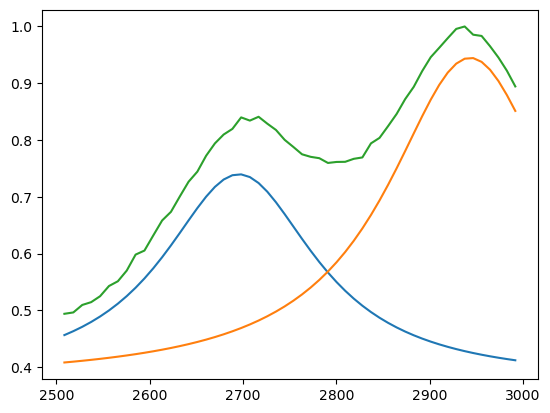

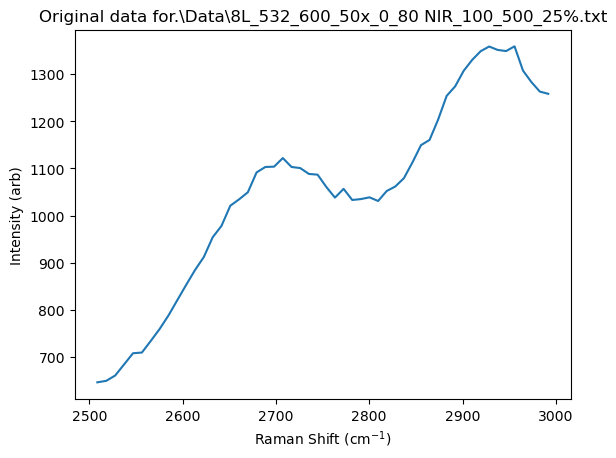

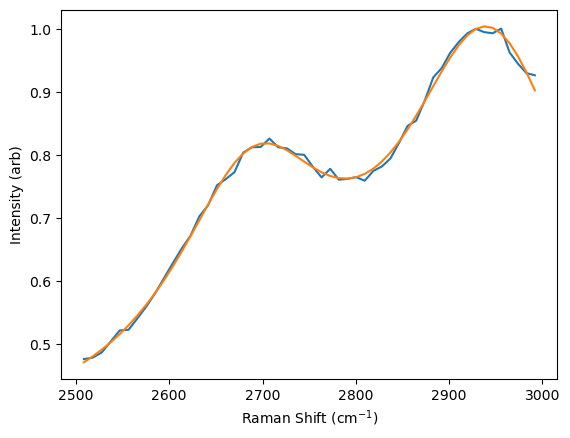

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.7122e+00                                    1.77e+01    
       1              5         7.1486e-01      3.00e+00       1.31e+01       2.34e-01    
       2              8         6.6974e-01      4.51e-02       1.64e+00       2.42e-02    
       3              9         6.5318e-01      1.66e-02       3.28e+00       6.12e-02    
       4             10         6.2731e-01      2.59e-02       6.56e+00       2.29e-01    
       5             11         5.3689e-01      9.04e-02       1.31e+01       2.94e-01    
       6             12         3.7167e-01      1.65e-01       2.62e+01       5.04e-01    
       7             13         1.3630e-01      2.35e-01       5.25e+01       8.89e-01    
       8             14         5.1142e-02      8.52e-02       6.15e+01       1.72e+00    
       9             15         3.2794e-03      4.79e-02       2.73e+01       1.08e-01    

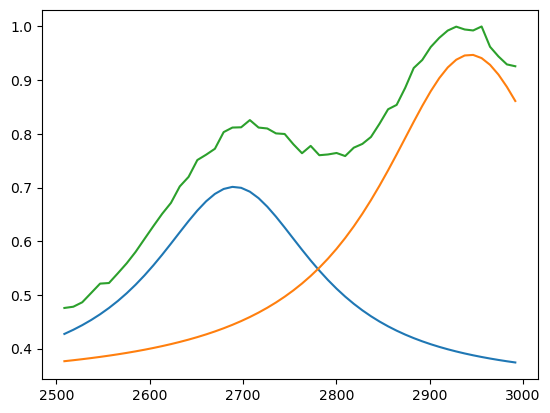

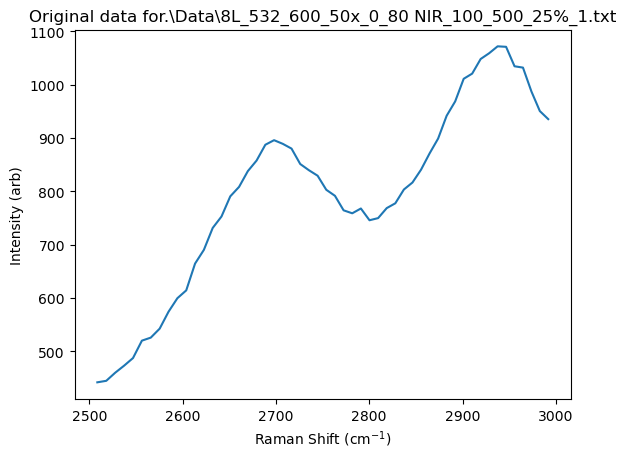

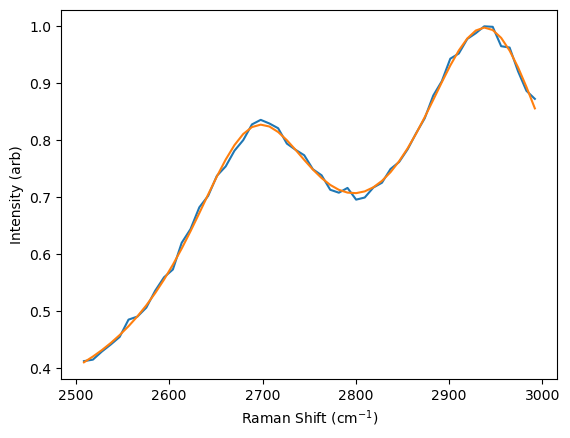

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5213e+00                                    1.73e+01    
       1              5         7.0536e-01      2.82e+00       1.31e+01       2.78e-01    
       2              8         6.3608e-01      6.93e-02       1.63e+00       5.32e-02    
       3              9         6.1614e-01      1.99e-02       3.26e+00       4.77e-02    
       4             10         5.8957e-01      2.66e-02       6.53e+00       2.20e-01    
       5             11         5.1261e-01      7.70e-02       1.31e+01       2.83e-01    
       6             12         3.6056e-01      1.52e-01       2.61e+01       4.98e-01    
       7             13         1.8539e-01      1.75e-01       5.22e+01       6.43e-01    
       8             15         4.9443e-02      1.36e-01       2.61e+01       1.32e+00    
       9             16         8.9209e-03      4.05e-02       3.11e+01       2.54e-01    

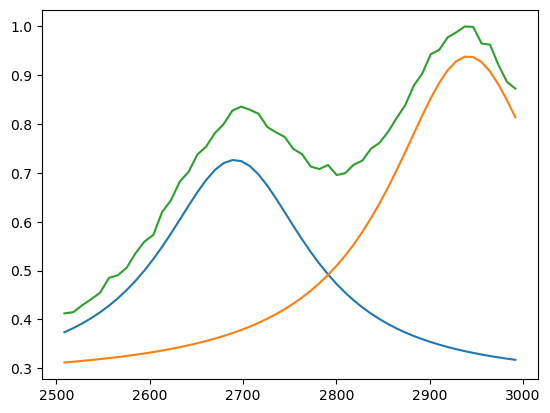

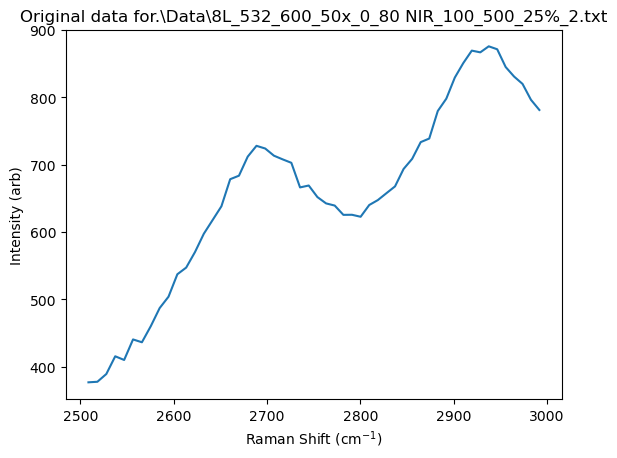

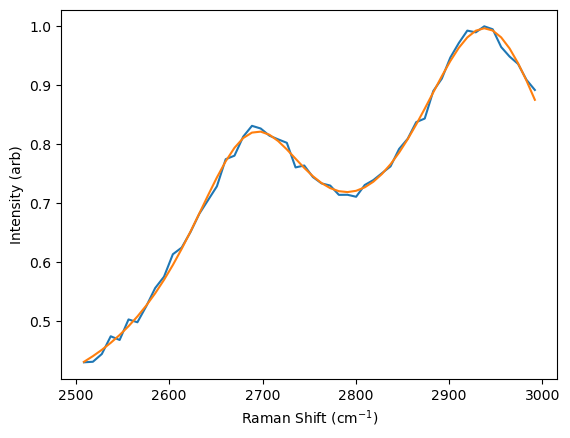

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6796e+00                                    1.51e+01    
       1              5         5.9182e-01      2.09e+00       1.23e+01       3.86e-01    
       2              8         4.8921e-01      1.03e-01       1.54e+00       6.30e-02    
       3              9         4.7488e-01      1.43e-02       3.08e+00       4.12e-02    
       4             10         4.5620e-01      1.87e-02       6.17e+00       1.92e-01    
       5             11         3.9270e-01      6.35e-02       1.23e+01       2.37e-01    
       6             12         3.3853e-01      5.42e-02       2.47e+01       6.05e-01    
       7             13         2.0504e-01      1.33e-01       2.47e+01       3.62e-01    
       8             14         1.0859e-01      9.65e-02       4.93e+01       3.63e-01    
       9             15         4.2484e-02      6.61e-02       5.79e+01       3.42e-01    

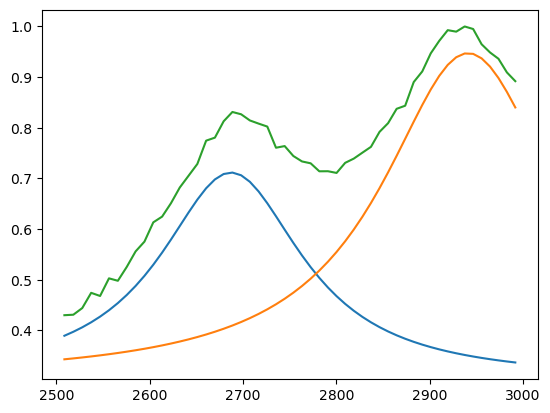

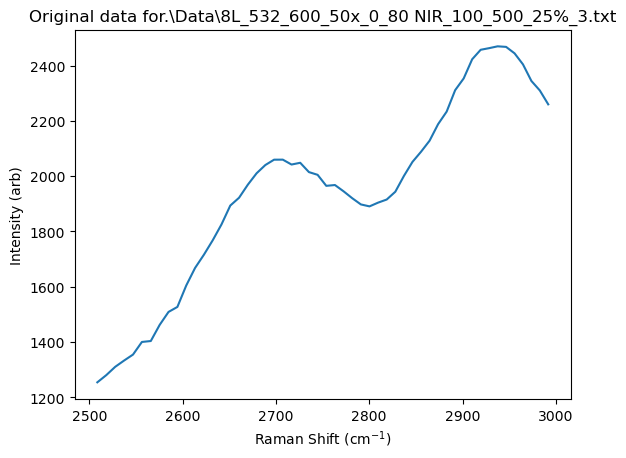

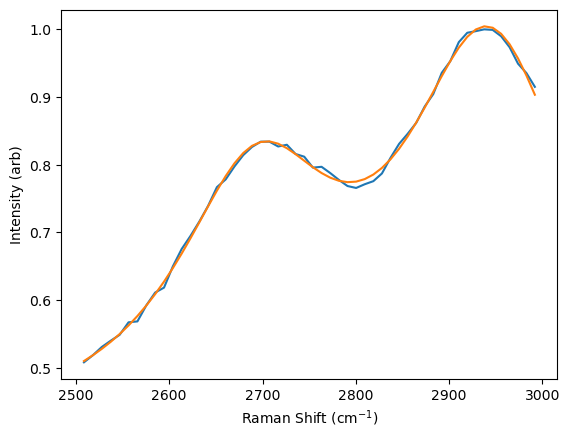

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.3600e+00                                    2.14e+01    
       1              5         9.6693e-01      4.39e+00       1.31e+01       5.86e-01    
       2              8         9.2604e-01      4.09e-02       1.64e+00       7.93e-02    
       3             10         9.2117e-01      4.87e-03       8.19e-01       7.95e-03    
       4             11         9.1408e-01      7.09e-03       1.64e+00       7.36e-02    
       5             12         8.9801e-01      1.61e-02       3.28e+00       1.17e-01    
       6             13         8.5411e-01      4.39e-02       6.55e+00       1.83e-01    
       7             14         7.4219e-01      1.12e-01       1.31e+01       3.55e-01    
       8             15         5.0281e-01      2.39e-01       2.62e+01       6.02e-01    
       9             16         1.5739e-01      3.45e-01       5.24e+01       1.20e+00    

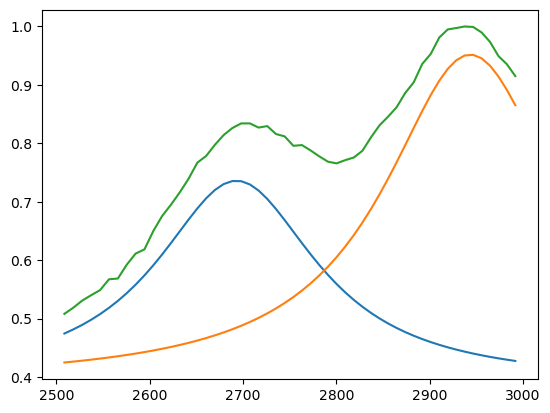

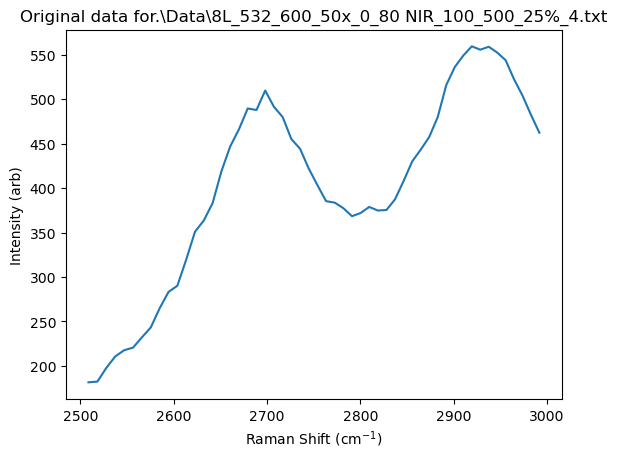

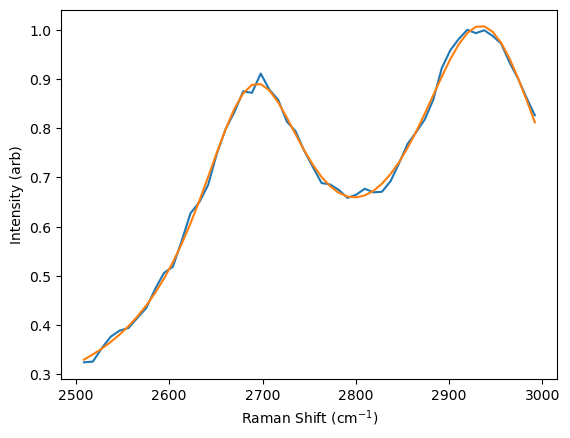

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0603e+00                                    1.61e+01    
       1              5         6.0718e-01      2.45e+00       1.33e+01       2.21e-01    
       2              7         5.6938e-01      3.78e-02       6.65e+00       3.47e-01    
       3              8         5.1495e-01      5.44e-02       6.65e+00       1.90e-01    
       4              9         4.5235e-01      6.26e-02       1.33e+01       2.88e-01    
       5             10         4.2152e-01      3.08e-02       2.66e+01       8.14e-01    
       6             11         2.4290e-01      1.79e-01       2.66e+01       5.77e-01    
       7             12         1.4721e-01      9.57e-02       5.32e+01       5.46e-01    
       8             16         1.2739e-01      1.98e-02       1.66e+00       4.74e-02    
       9             18         1.2590e-01      1.49e-03       8.31e-01       4.92e-02    

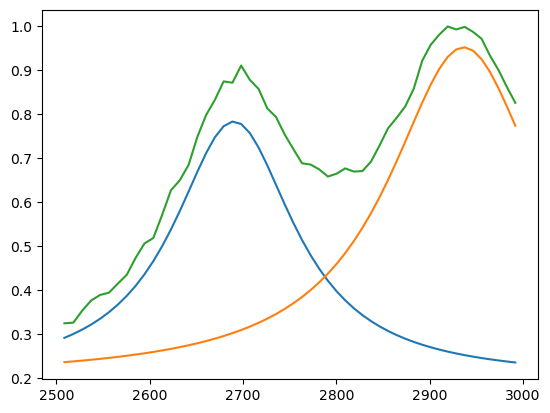

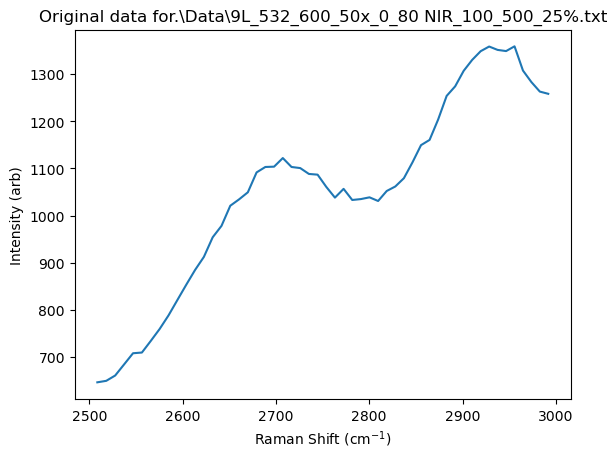

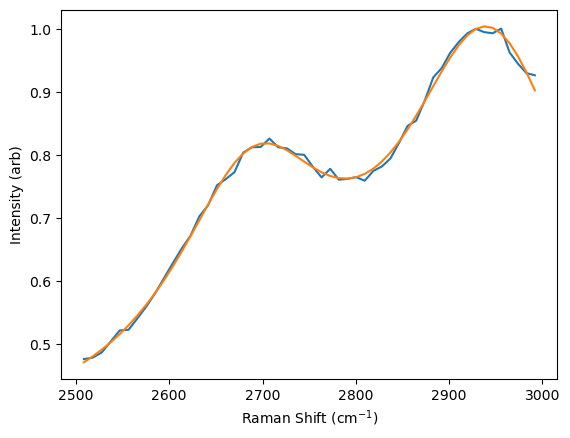

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5937e+00                                    1.76e+01    
       1              5         6.2373e-01      2.97e+00       1.17e+01       4.10e-01    
       2              8         6.0086e-01      2.29e-02       1.46e+00       5.80e-02    
       3             10         5.9775e-01      3.11e-03       7.31e-01       1.09e-02    
       4             11         5.9467e-01      3.07e-03       1.46e+00       6.38e-02    
       5             12         5.8606e-01      8.62e-03       2.92e+00       9.22e-02    
       6             13         5.6185e-01      2.42e-02       5.85e+00       1.36e-01    
       7             14         4.9915e-01      6.27e-02       1.17e+01       2.48e-01    
       8             15         3.6409e-01      1.35e-01       2.34e+01       4.47e-01    
       9             16         1.4480e-01      2.19e-01       4.68e+01       7.53e-01    

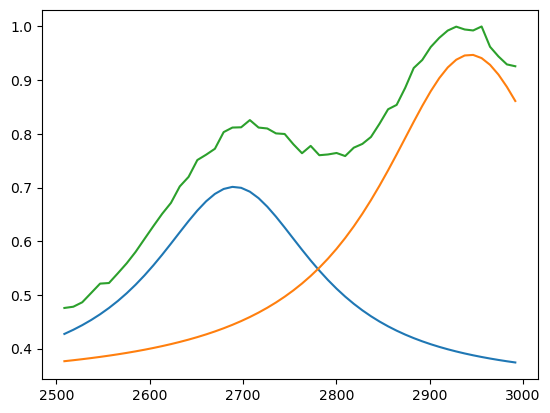

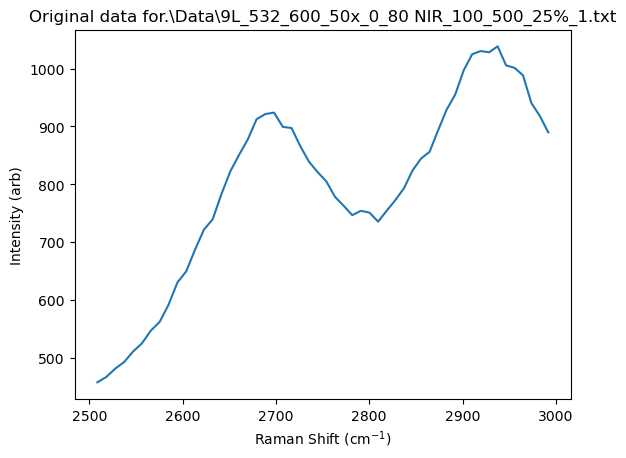

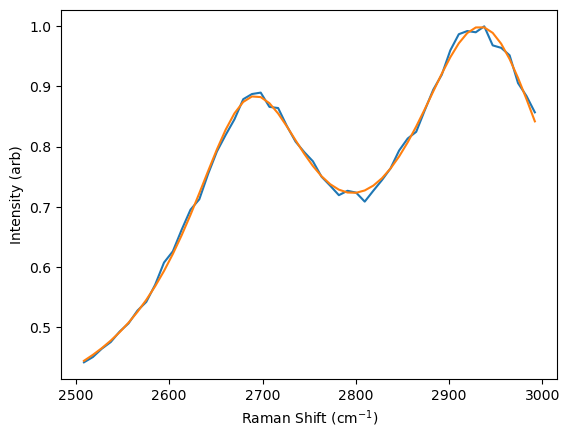

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.0672e+00                                    2.77e+01    
       1              5         1.7835e+00      7.28e+00       1.62e+01       1.65e+00    
       2              6         1.5698e+00      2.14e-01       3.24e+01       1.33e+00    
       3              7         1.2541e+00      3.16e-01       3.24e+01       6.79e-01    
       4              8         1.2525e+00      1.55e-03       6.47e+01       2.42e+00    
       5              9         5.9619e-01      6.56e-01       1.62e+01       1.75e+00    
       6             10         4.6107e-01      1.35e-01       3.24e+01       1.48e+00    
       7             11         2.7646e-01      1.85e-01       3.24e+01       1.82e-01    
       8             12         2.3063e-01      4.58e-02       6.47e+01       2.00e+00    
       9             13         9.6196e-02      1.34e-01       6.47e+01       1.56e-01    

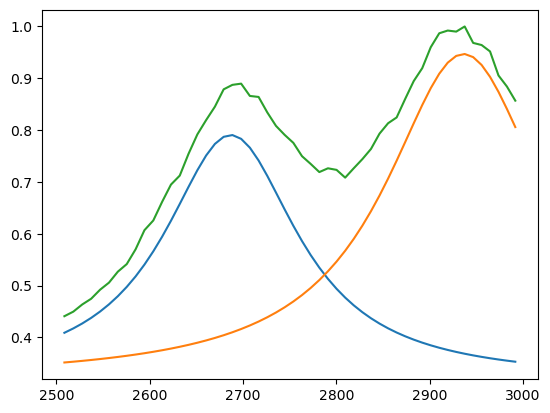

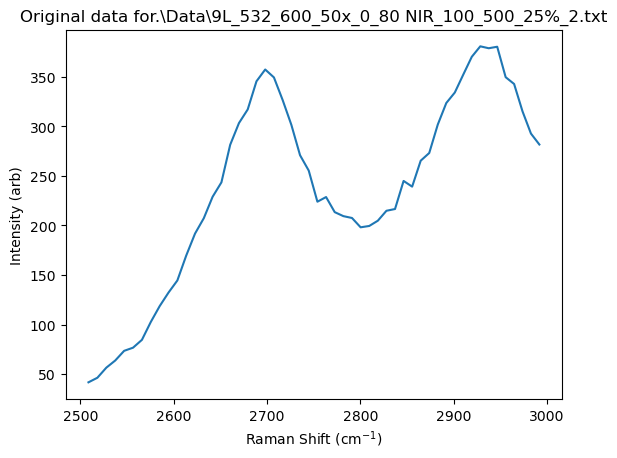

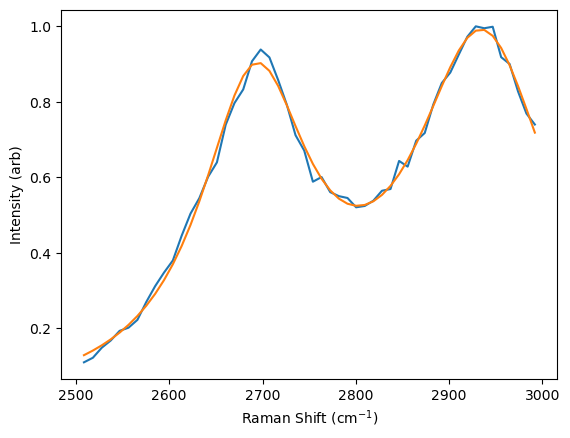

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3251e+00                                    1.93e+01    
       1              5         7.7679e-01      3.55e+00       1.35e+01       6.60e-01    
       2              7         7.1950e-01      5.73e-02       6.77e+00       9.08e-02    
       3              8         6.6794e-01      5.16e-02       1.35e+01       4.65e-01    
       4             10         5.9418e-01      7.38e-02       6.77e+00       1.36e-01    
       5             11         4.9481e-01      9.94e-02       1.35e+01       3.05e-01    
       6             12         3.9455e-01      1.00e-01       2.71e+01       8.87e-01    
       7             13         1.7083e-01      2.24e-01       2.71e+01       6.71e-01    
       8             14         5.2683e-02      1.18e-01       5.42e+01       5.59e-01    
       9             15         1.5511e-02      3.72e-02       5.27e+01       7.01e-01    

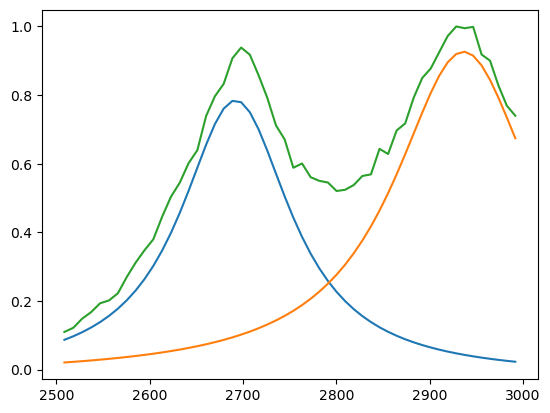

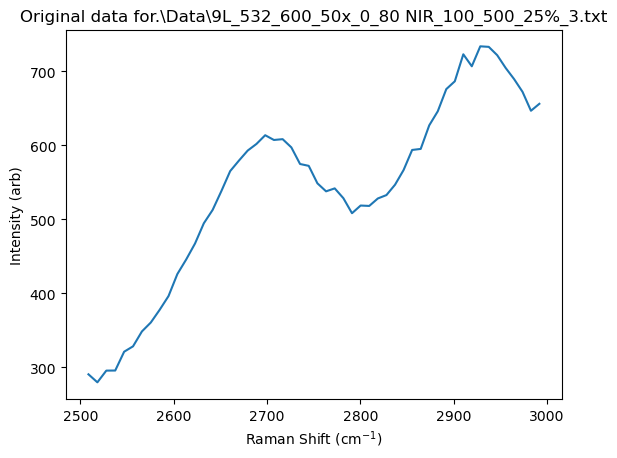

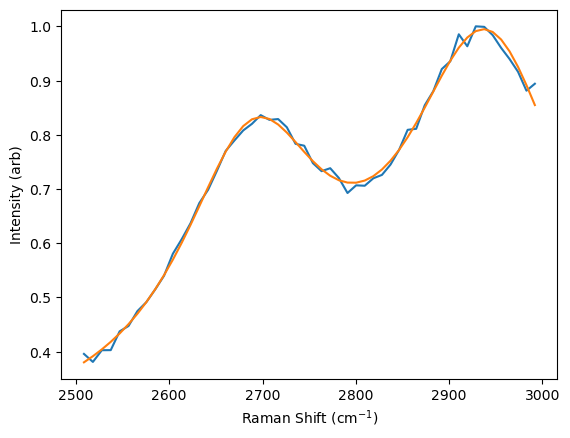

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3106e+00                                    1.40e+01    
       1              5         6.1453e-01      1.70e+00       1.22e+01       5.64e-01    
       2              8         4.2194e-01      1.93e-01       1.52e+00       8.63e-02    
       3              9         4.0843e-01      1.35e-02       3.05e+00       4.00e-02    
       4             10         3.9147e-01      1.70e-02       6.10e+00       1.76e-01    
       5             11         3.3774e-01      5.37e-02       1.22e+01       2.20e-01    
       6             12         2.5109e-01      8.66e-02       2.44e+01       3.81e-01    
       7             14         1.9905e-01      5.20e-02       1.22e+01       1.49e-01    
       8             15         1.2816e-01      7.09e-02       2.44e+01       2.38e-01    
       9             16         1.1017e-01      1.80e-02       4.88e+01       1.08e+00    

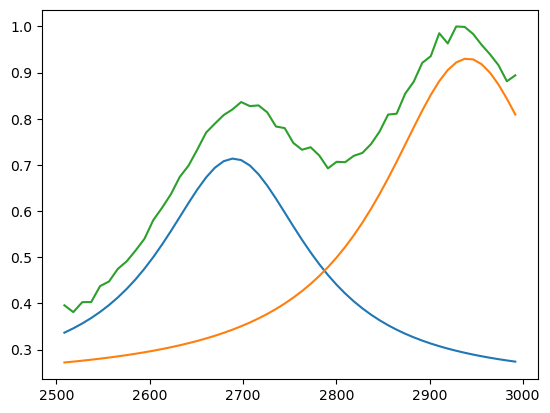

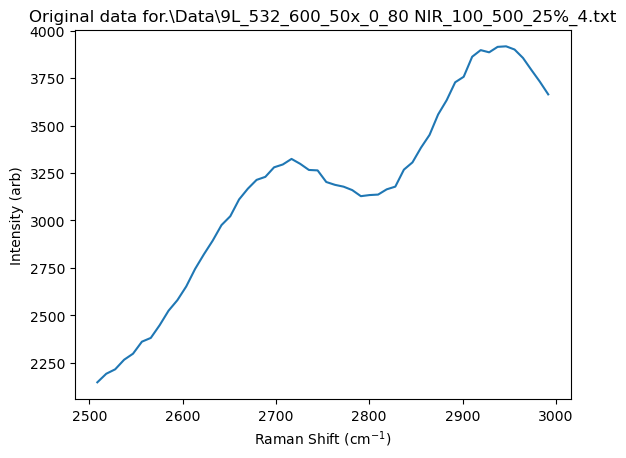

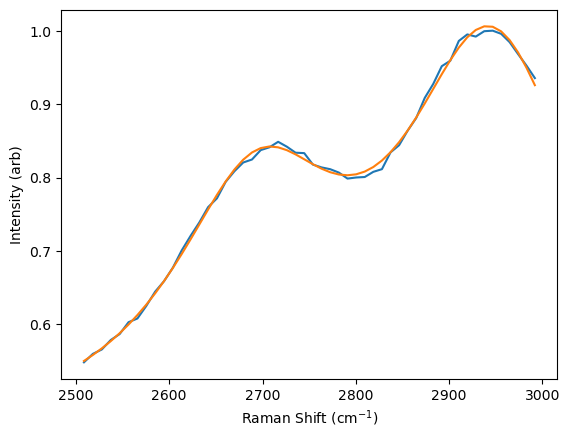

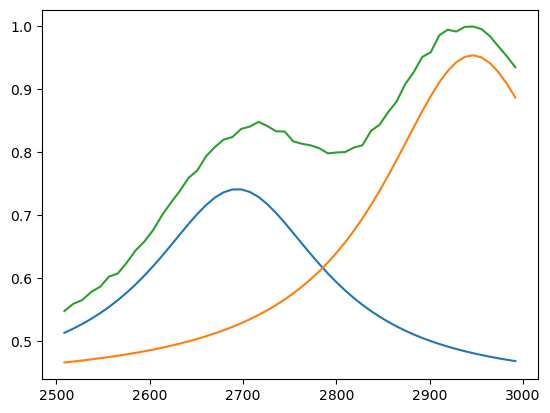

In [4]:

for file_index in range(len(files_list)):
    file_name=files_list[file_index]
    file_data=pd.read_csv(file_name, delimiter='\t', header=None, names=['x',  'Intensity'] )
    file_data=file_data[file_data['x']>initial_conditions['Bottom limit']]
    file_data=file_data[file_data['x']<initial_conditions['Up limit']]
    file_data=file_data.reset_index()

    #print(file_data)
    
    fig1=plt.figure()
    plt.plot(file_data['x'], file_data['Intensity'])
    plt.xlabel('Raman Shift (cm$^{-1}$)')
    plt.ylabel('Intensity (arb)')
    plt.title ('Original data for'+str(file_name))

    help_=initial_conditions['Help list']
    
    
    xData=file_data['x']
    yData=file_data['Intensity']
    yData = yData / max(yData)

    generalWidth = 1

    yDataLoc = yData
    startValues = [ max( yData ) ]   
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]   
    offset=minY
    startValues=[offset]
    for index_1 in range(initial_conditions['Number of peaks']):
        startValues+=[help_[index_1], minY - max( yDataLoc ), generalWidth,]
    popt= least_squares( res_multi_lorentz, startValues, args=( xData, yData ), verbose=2, max_nfev=99999999 )
    #yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

    testData = [ multi_lorentz(x, popt['x'] ) for x in xData ]

    fig = plt.figure()
    ax = fig.add_subplot( 1, 1, 1 )
    ax.plot( xData, yData )
    ax.plot( xData, testData )
    plt.xlabel('Raman Shift (cm$^{-1}$)')
    plt.ylabel('Intensity (arb)')
    plt.xlabel
    plt.show()

    fig1=plt.figure()
    index_1=0
    lorentz_conditions=popt['x'][1:]
    while index_1 <len(lorentz_conditions):
        plt.plot(xData, popt['x'][0]+lorentzian(xData, lorentz_conditions[index_1], lorentz_conditions[index_1+1], lorentz_conditions[index_1+2]))
        index_1=index_1+3
    plt.plot(xData, yData)

    

    
    
    


In [105]:
lorentz_conditions[0]

2690.65687011366

In [72]:
file=pd.read_csv(r'Data\2L_532_600_50x_0_80 NIR_100_500_25%_4.txt', delimiter='\t', header=None, names=['x',  'Intensity'] )

file=file[file['x']>2500]
file=file[file['x']<3000]
file=file.reset_index()


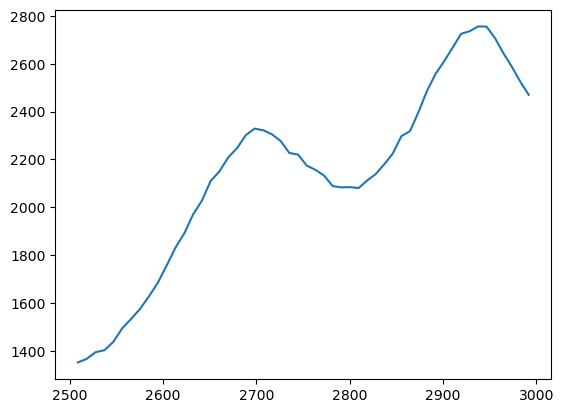

In [73]:
plt.plot(file['x'], file['Intensity'])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4586e+00                                    9.68e+00    
       1              5         5.8547e-01      8.73e-01       1.20e+01       2.38e-01    
       2              8         5.2139e-01      6.41e-02       1.51e+00       4.62e-02    
       3              9         5.0983e-01      1.16e-02       3.01e+00       5.23e-02    
       4             10         4.9390e-01      1.59e-02       6.02e+00       2.07e-01    
       5             11         4.3081e-01      6.31e-02       1.20e+01       2.33e-01    
       6             12         3.1694e-01      1.14e-01       2.41e+01       4.48e-01    
       7             13         1.7417e-01      1.43e-01       4.82e+01       5.71e-01    
       8             15         5.0228e-02      1.24e-01       2.41e+01       9.92e-01    
       9             16         1.2687e-02      3.75e-02       3.75e+01       3.56e-01    

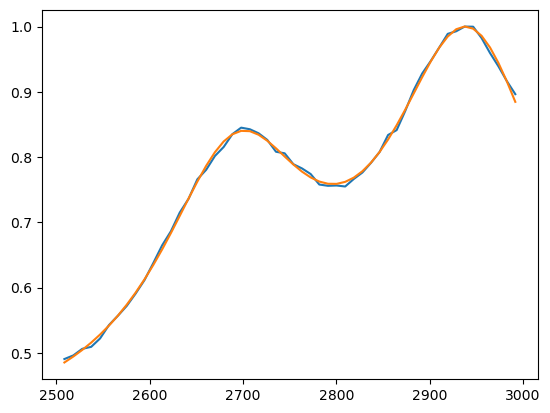

In [74]:



yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0    
minP = np.argmin( yDataLoc )
minY = yData[ minP ]   
#print('lc1')
offset=0.6
startValues = [offset, help_[0], minY - max( yDataLoc ), generalWidth, help_[1], minY - max( yDataLoc ), generalWidth]
popt= least_squares( res_multi_lorentz, startValues, args=( xData, yData ), verbose=2, max_nfev=99999999 )
#yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

testData = [ multi_lorentz(x, popt['x'] ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()


In [82]:
popt

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-5.280e-03 -1.675e-03 ... -4.946e-04 -1.178e-02]
           x: [ 3.591e-01  2.692e+03  3.844e-01 -1.022e+02  2.942e+03
                5.852e-01 -1.094e+02]
        cost: 0.0005209809018173479
         jac: [[ 1.000e+00 -7.561e-04 ...  5.989e-02 -6.021e-04]
               [ 1.000e+00 -8.422e-04 ...  6.245e-02 -6.262e-04]
               ...
               [ 1.000e+00  2.592e-04 ...  8.789e-01 -1.138e-03]
               [ 1.000e+00  2.396e-04 ...  8.295e-01 -1.513e-03]]
        grad: [-3.334e-12  3.173e-10 -1.227e-10 -2.547e-10  1.805e-10
               -2.485e-10  1.344e-10]
  optimality: 3.17278049851295e-10
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
                0.000e+00  0.000e+00]
        nfev: 21
        njev: 15

In [75]:
print( popt['x'])

[ 3.59146376e-01  2.69225292e+03  3.84352779e-01 -1.02216318e+02
  2.94222580e+03  5.85205410e-01 -1.09437587e+02]


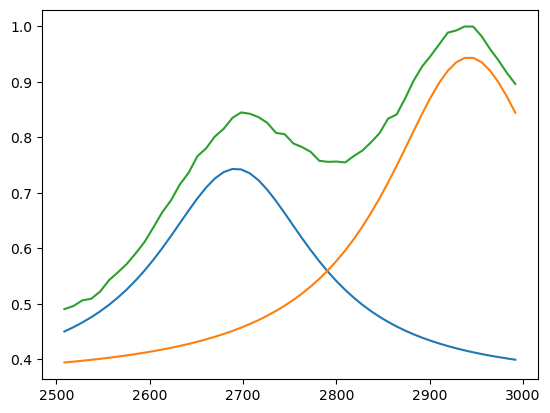

In [76]:
plt.plot(xData, popt['x'][0]+lorentzian(xData, popt['x'][1], popt['x'][2], popt['x'][3]))
plt.plot(xData, popt['x'][0]+lorentzian(xData, popt['x'][4], popt['x'][5], popt['x'][6]))

#plt.plot(xData, lorentzian(xData, popt['x'][6], popt['x'][7], popt['x'][8]))
plt.plot(xData, yData)

In [ ]:
popt['x']

c:\Users\johan\.conda\envs\physics\lib\site-packages\scipy\optimize\_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


[ 1.40023884e+00 -1.22111378e+07 -3.68425939e+04 -6.35799523e+04
 -2.35346156e+04  3.32519506e+01  1.76131404e+00]


c:\Users\johan\.conda\envs\physics\lib\site-packages\scipy\optimize\_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 1600.
  warnings.warn(errors[info][0], RuntimeWarning)


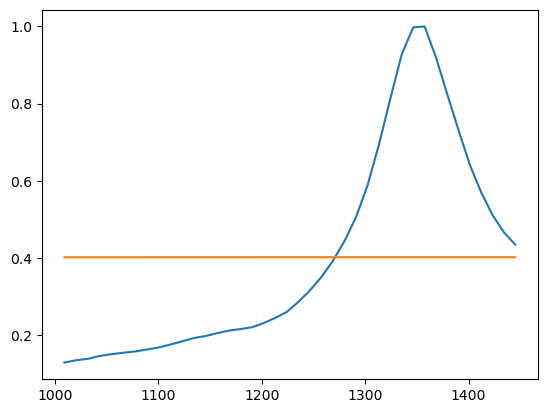

In [152]:
help_=[1598,1346]

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 2: ### max 20 peak...emergency break to avoid infinite loop
        #print('lc')
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    

    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    #print('lc1')
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ))
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print (popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
functions={}

totel=[]

class Lorentzian_function:
    generalWidth=1

    def __init__(self, x0, minY, yDataLoc):
        self.x0=x0
        self.minY=minY
        self.yDataLoc=yDataLoc

def CreateLorentzianFunctions(n, x0, minY, yDataLoc):
    global functions
    for index_1 in range (n):
        functions['clss'+str(index_1)]=Lorentzian_function(x0, minY, yDataLoc)
#CreateLorentzianFunctions(4, x0, minY, yDataLoc)

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )


lista={}
for index in range (5):
    lista[index]={}
    lista[index]['x']=[]
    lista[index]['y']=[]


def multi_lorentz2( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    #return_data=off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )
    i=0
    var_number=len(totel)
    #print(var_number)
    

    while i<(len(paramsRest)):
        return_data=lorentzian( x, paramsRest[i], paramsRest[i+1], paramsRest[i+2])
        #print(x)
        #print(return_data)
        if not (x in lista[0]['x']):
            lista[0]['x'].append(x)
            lista[0]['y'].append(return_data)
        else:
            if not (x in lista[1]['x']):
                lista[1]['x'].append(x)
                lista[1]['y'].append(return_data)
            else:
                if not (x in lista[2]['x']):
                    lista[2]['x'].append(x)
                    lista[2]['y'].append(return_data)
                else:
                    if not (x in lista[3]['x']):
                        lista[3]['x'].append(x)
                        lista[3]['y'].append(return_data)
                    else:
                        if not (x in lista[4]['x']):
                            lista[4]['x'].append(x)
                            lista[4]['y'].append(return_data)


                

        i=i+3
        #fig1=plt.figure()
        plt.plot(lista[0]['x'],lista[0]['y'])
        #fig1=plt.figure()
        plt.plot(lista[1]['x'],lista[1]['y'])
        plt.plot(lista[2]['x'],lista[2]['y'])
        plt.plot(lista[3]['x'],lista[3]['y'])
        plt.plot(lista[4]['x'],lista[4]['y'])
        #print(lista)
    return_data=return_data+off
    #plt.plot(x, return_data)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )



def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0
poptl=[]
#print(max( yDataLoc ) - min( yDataLoc ))

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter < 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    functions['clss'+str(counter-1)].x0=x0
    functions['clss'+str(counter-1)].minY=minY
    functions['clss'+str(counter-1)].yDataLoc=yDataLoc
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]
    poptl.append(popt)

print (popt)


testData = [ multi_lorentz2(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
lorentz_indv_data

In [ ]:
totel[-1]

In [ ]:
xx1=lorentzian(xData, totel[-1][0],totel[-1][1],totel[-1][2])
xx2=lorentzian(xData, totel[-1][3],totel[-1][4],totel[-1][5])
xx3=lorentzian(xData, totel[-1][6],totel[-1][7],totel[-1][8])
xx4=lorentzian(xData, totel[-1][9],totel[-1][10],totel[-1][11])

In [ ]:
suma=min(yData)+min(xx3)
plt.plot(xData, -xx3)
plt.plot(xData, yData)

In [ ]:
plt.plot(xData,xx1)

In [ ]:
poptl

In [ ]:
testData = multi_lorentz(xData, [poptl[1][3],poptl[1][4],poptl[1][5],poptl[1][6]])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
#plt.plot(xData, yData)
for index_1 in range (3):   
    plt.plot(xData, lorentzian(xData, functions['clss'+str(index_1)].x0, functions['clss'+str(index_1)].minY, pd.Series(functions['clss'+str(index_1)].yDataLoc)))


In [ ]:
functions['clss1'].x0

In [ ]:
CreateLorentzianFunctions(4, x0, minY, yDataLoc)

In [ ]:
type(functions['clss0'].yDataLoc)

In [ ]:
popt[:3]

In [ ]:
plt.plot(xData, lorentzian(xData, functions['clss1'].x0, functions['clss1'].minY, functions['clss1'].yDataLoc))

In [ ]:
list(file['x'])[0]